## # BorderlineSMOTE: with class_weight variation

In [3]:
import utils as ut

In [4]:
df = pd.read_csv("../../insurance_fraud_detect_data.csv")
print(df.shape)

# 41개 삭제
ls = [43, 1504, 1762, 11706, 12031, 12665, 480, 4515, 4651, 8596, 9904, 10635, 11104, 11120, 11994, 12956,
      12972, 14533, 14792, 15242, 209, 268, 12132, 8477, 12705, 8514, 532, 4158, 5401, 13077, 4595, 6839,
      11710, 12377, 15080, 1115, 5398, 5790, 9523, 9528, 12050]
print(len(ls))
socar = df.drop(ls)
print(socar.shape)
socar.head(3)

(16000, 25)
41
(15959, 25)


fraud_YN  car_model  sharing_type  age_group  has_previous_accident  \
0         0          2             1          3                      0   
1         0          1             0          4                      0   
2         0          1             0          4                      1   

   cumulative_use_count  b2b  accident_ratio  pf_type  socarpass  ...  \
0                     2    0             100        2          0  ...   
1                     4    0               0        3          1  ...   
2                     4    0             100        3          1  ...   

   insure_cost  accident_location  car_part1  car_part2  repair_cnt  \
0            0                  1          0          0           1   
1            0                  1          1          1           2   
2     12925040                  3          1          0           2   

   acc_type1  insurance_site_aid_YN  police_site_aid_YN  total_prsn_cnt  \
0          0                      0                   0              -1   
1          1                      1                   1               0   
2          1                      1                   1               0   

   test_set  
0         0  
1         1  
2         1  

[3 rows x 25 columns]

# BorderlineSMOTE

### (1) null_del = Y , encoded = Y , scaler = None

In [5]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.9s
====Done Evaluation====
====Done Evaluation====


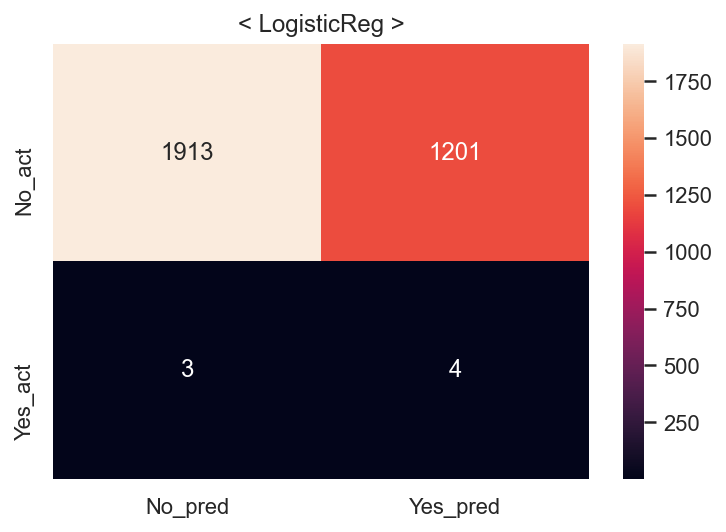

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


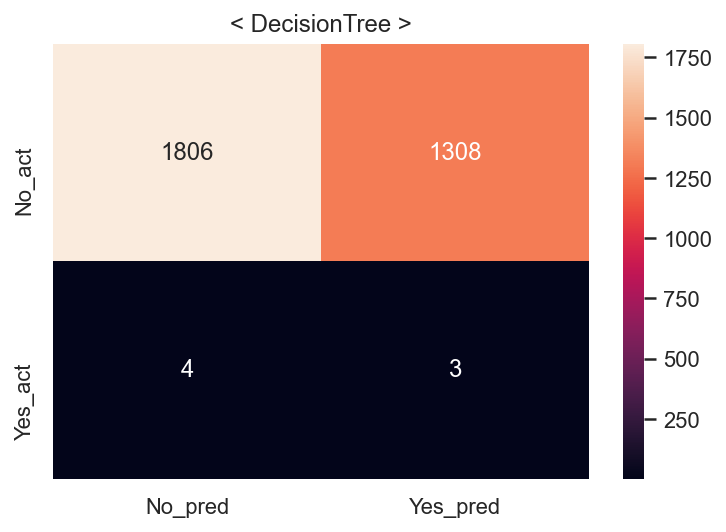

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


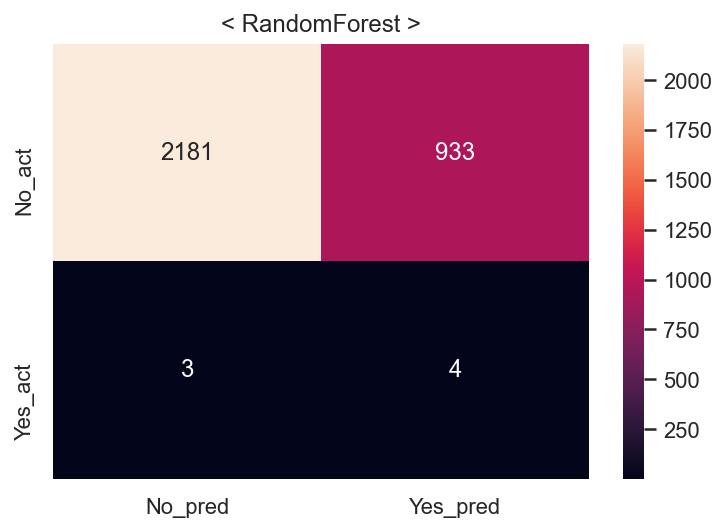

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


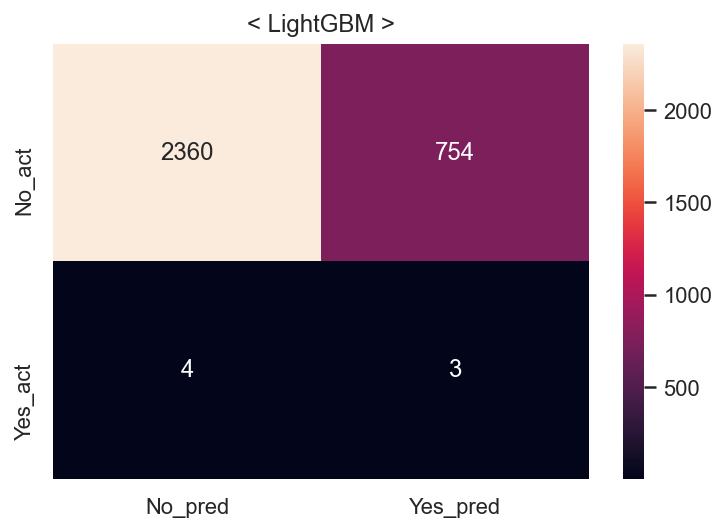

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  48.0s
====Done Evaluation====
====Done Evaluation====


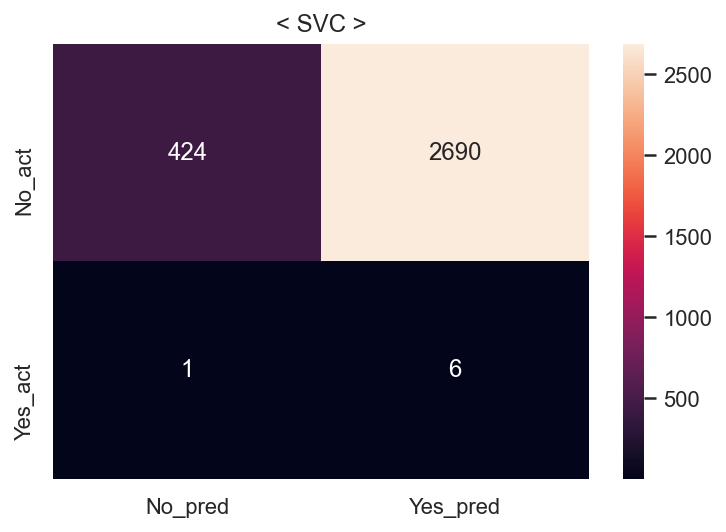

Fit time : 8.9 min


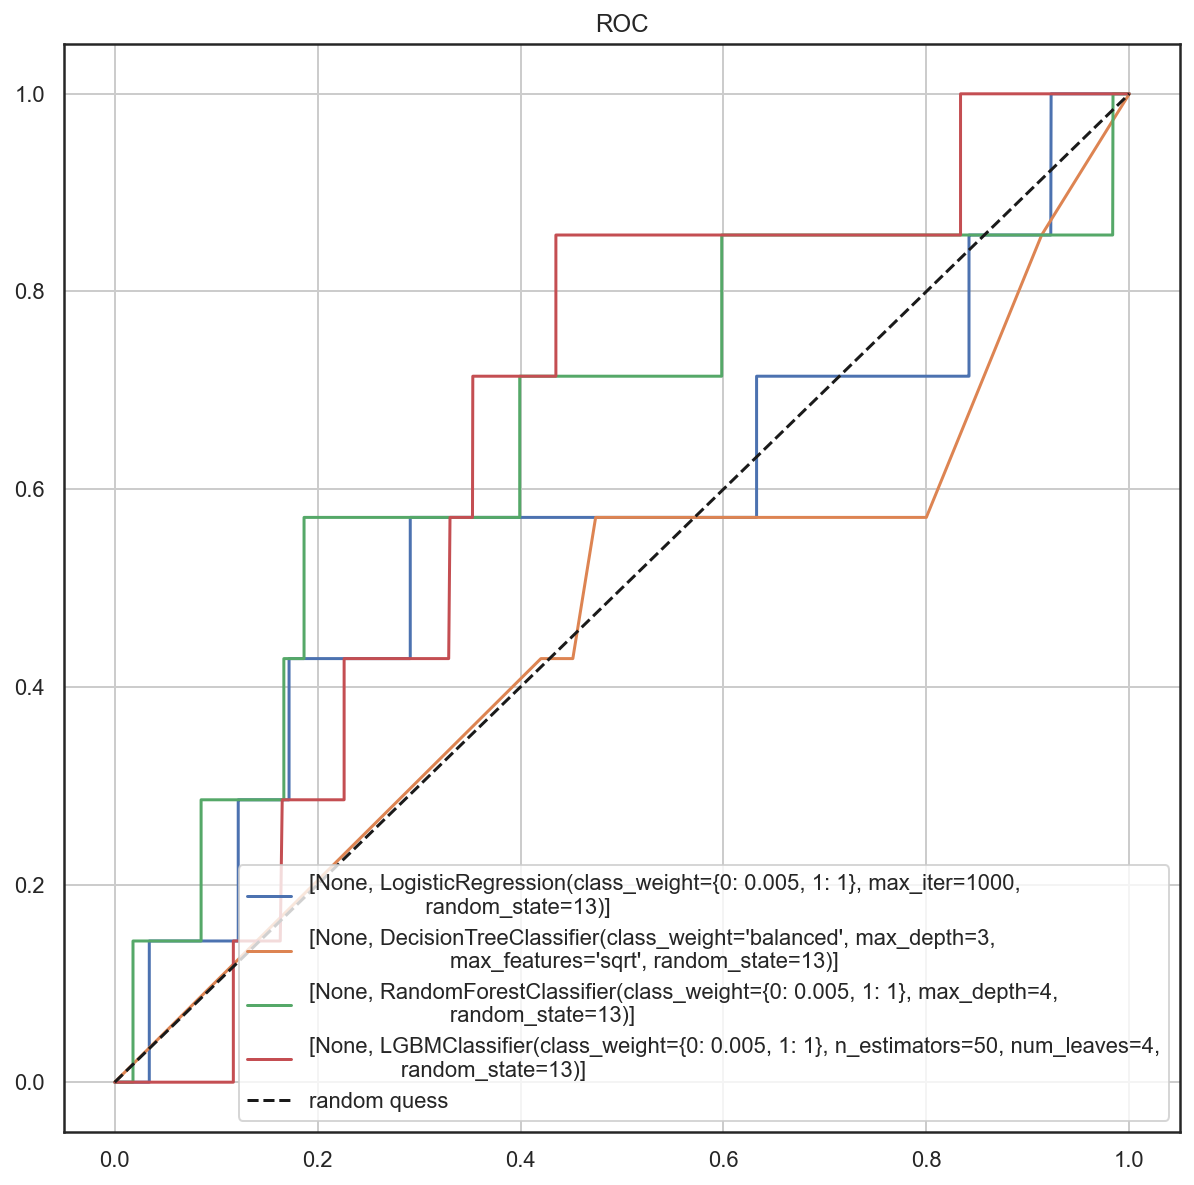

In [6]:
cv_list1, result_df1 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [7]:
result_df1["null_del"] = [1]  * len(result_df1)
result_df1["encoded"] = [1]  * len(result_df1)
result_df1["scaler"] = ["None"]  * len(result_df1)
result_df1["sampler"] = ["BdlSMOTE"]  * len(result_df1)
result_df1 = result_df1[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df1

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1   None  BdlSMOTE   LogisticReg        0.843135   
1         1        1   None  BdlSMOTE  DecisionTree        0.786239   
2         1        1   None  BdlSMOTE  RandomForest        0.896009   
3         1        1   None  BdlSMOTE      LightGBM        0.909091   
4         1        1   None  BdlSMOTE           SVC        0.569510   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.761502      0.999219  0.864313   0.843135       0.614226   
1         0.700844      0.998828  0.823715   0.786239       0.579622   
2         0.828209      0.999297  0.905745   0.896009       0.700096   
3         0.846429      0.999531  0.916631   0.909091       0.757129   
4         0.537354      0.999922  0.699044   0.569510       0.137776   

   test precision  test recall   test f1  test auc  
0        0.003320     0.571429  0.006601  0.592875  
1        0.002288     0.428571  0.004552  0.504266  
2        0.004269     0.571429  0.008475  0.635907  
3        0.003963     0.428571  0.007853  0.593220  
4        0.002226     0.857143  0.004440  0.496651

### (2) null_del = Y , encoded = Y , scaler = MM

In [8]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


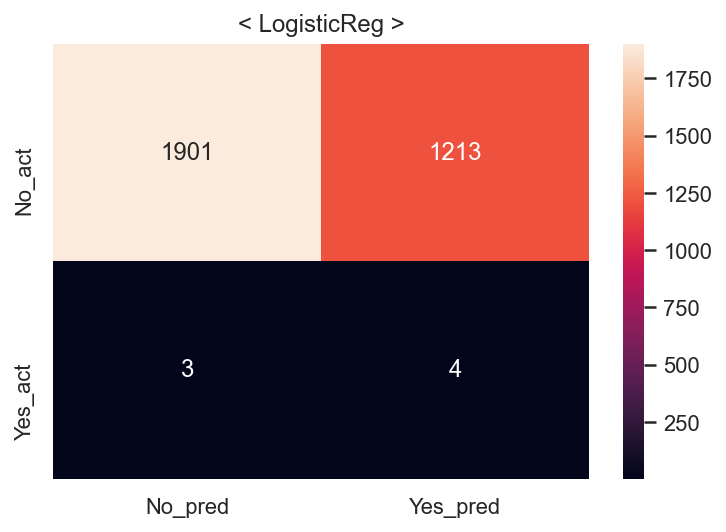

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


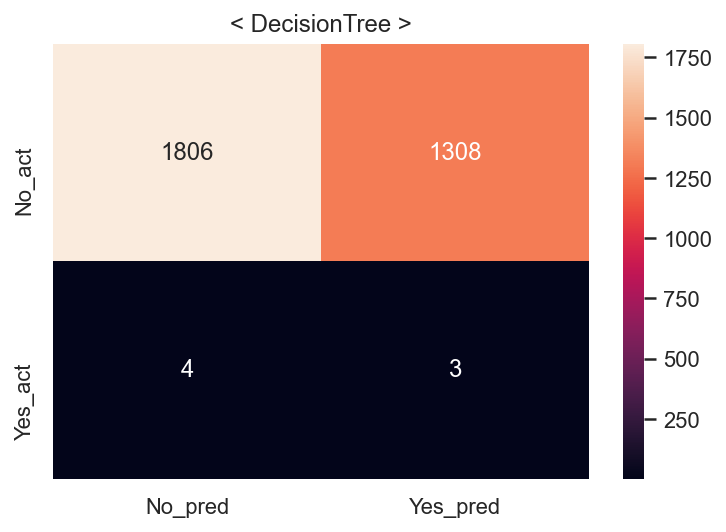

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


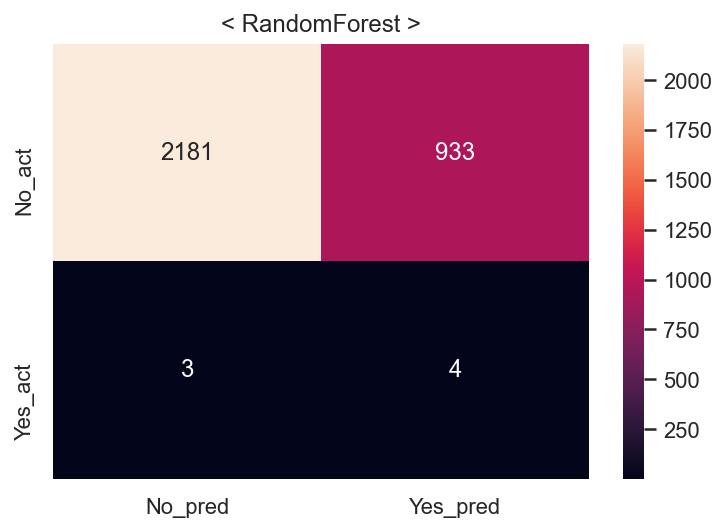

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


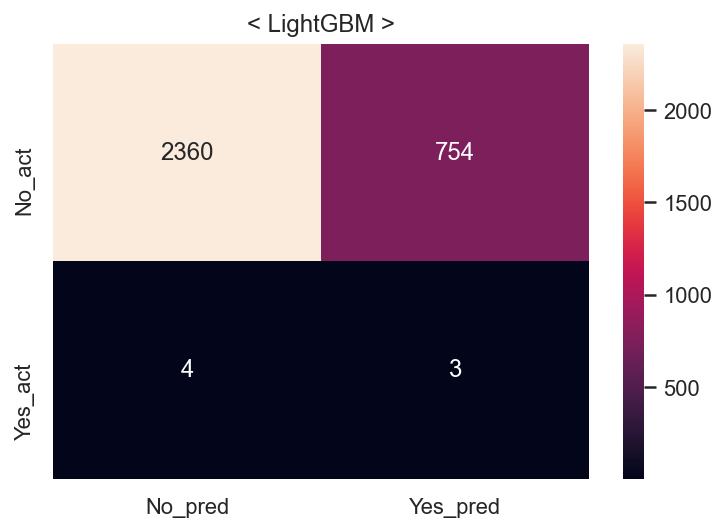

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.4s
====Done Evaluation====
====Done Evaluation====


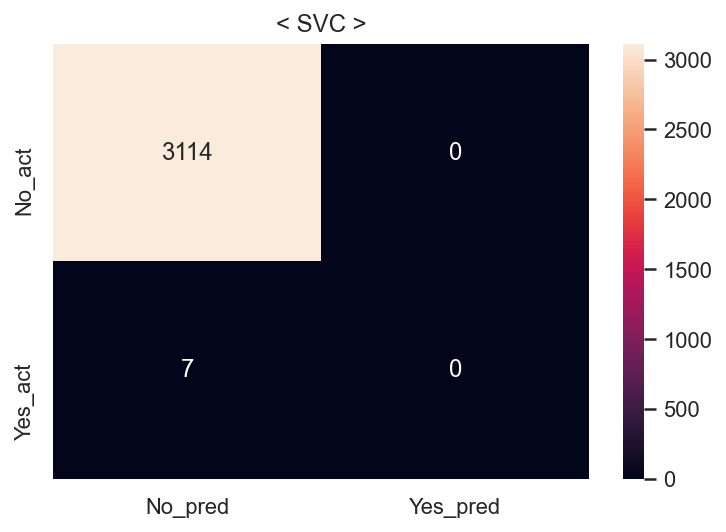

Fit time : 3.25 min


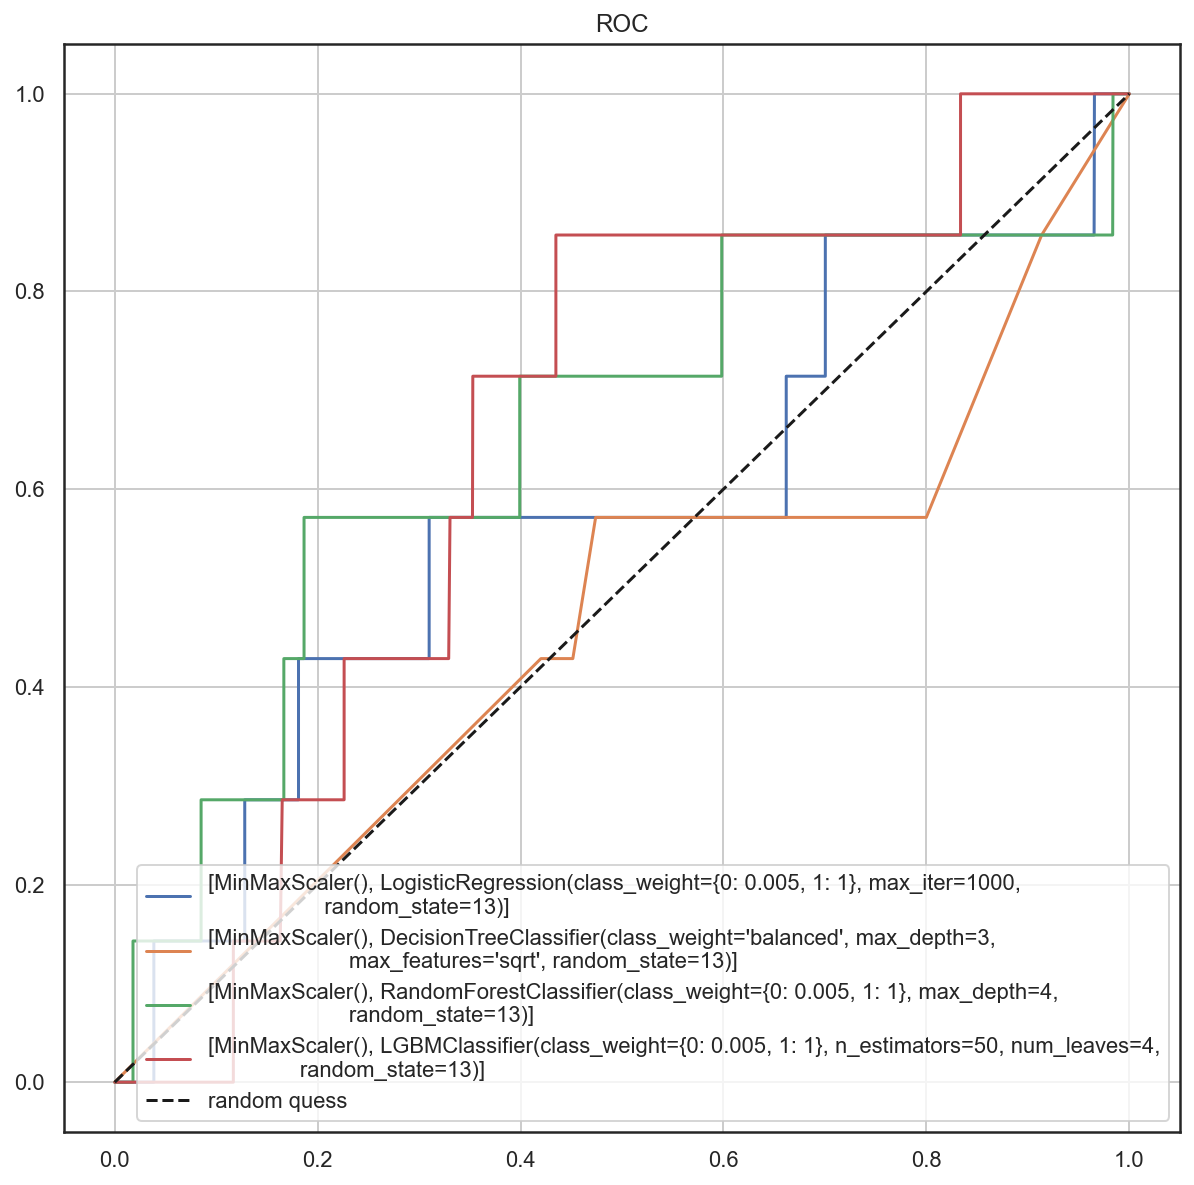

In [9]:
cv_list2, result_df2 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [10]:
result_df2["null_del"] = [1]  * len(result_df2)
result_df2["encoded"] = [1]  * len(result_df2)
result_df2["scaler"] = ["MM"]  * len(result_df2)
result_df2["sampler"] = ["BdlSMOTE"]  * len(result_df2)
result_df2 = result_df2[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df2

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1     MM  BdlSMOTE   LogisticReg        0.841026   
1         1        1     MM  BdlSMOTE  DecisionTree        0.786239   
2         1        1     MM  BdlSMOTE  RandomForest        0.896009   
3         1        1     MM  BdlSMOTE      LightGBM        0.909091   
4         1        1     MM  BdlSMOTE           SVC        0.998750   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.759063      0.999219  0.862740   0.841026       0.610381   
1         0.700844      0.998828  0.823715   0.786239       0.579622   
2         0.828209      0.999297  0.905745   0.896009       0.700096   
3         0.846429      0.999531  0.916631   0.909091       0.757129   
4         1.000000      0.997501  0.998749   0.998750       0.997757   

   test precision  test recall   test f1  test auc  
0        0.003287     0.571429  0.006536  0.590949  
1        0.002288     0.428571  0.004552  0.504266  
2        0.004269     0.571429  0.008475  0.635907  
3        0.003963     0.428571  0.007853  0.593220  
4        0.000000     0.000000  0.000000  0.500000

### (3) null_del = Y , encoded = Y , scaler = SD

In [12]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


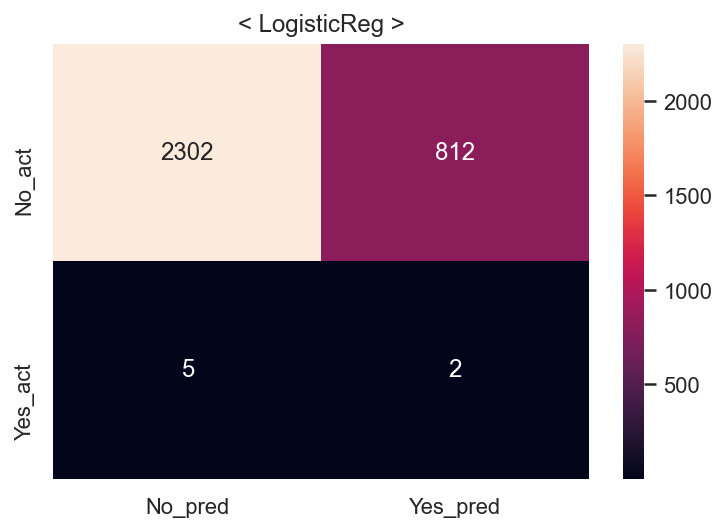

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


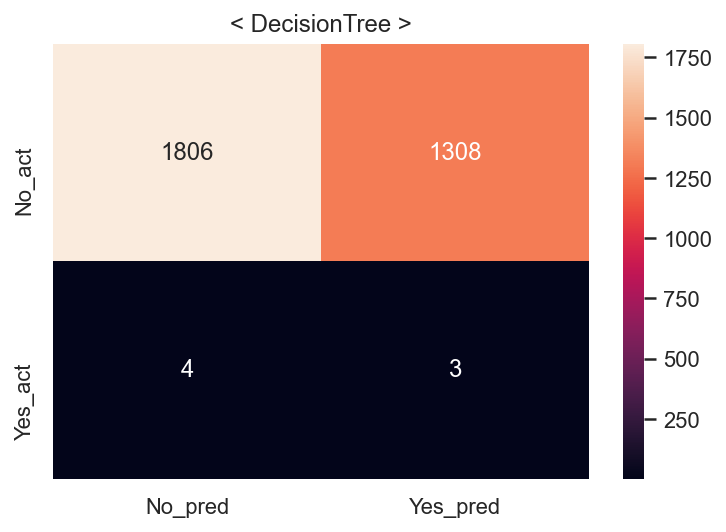

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


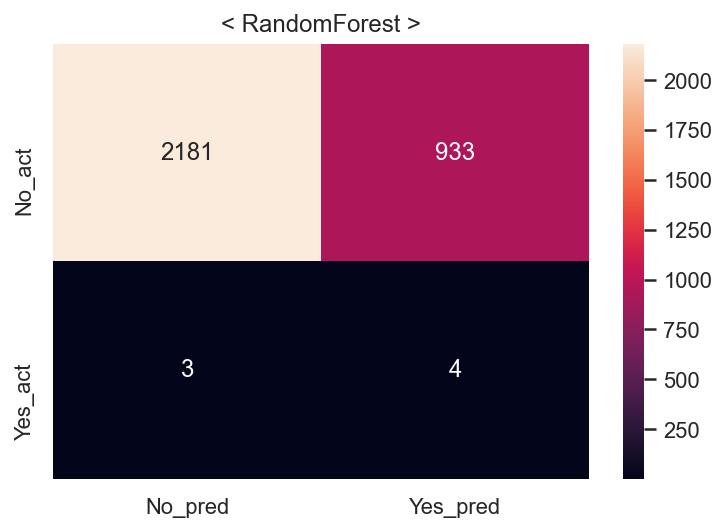

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


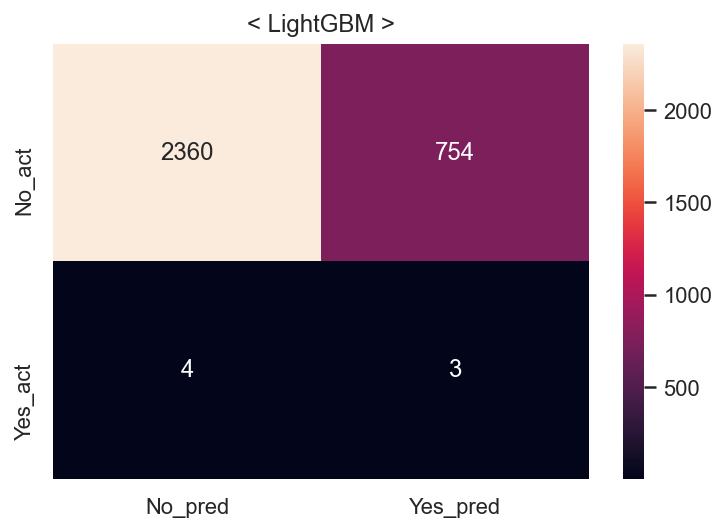

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.0s
====Done Evaluation====
====Done Evaluation====


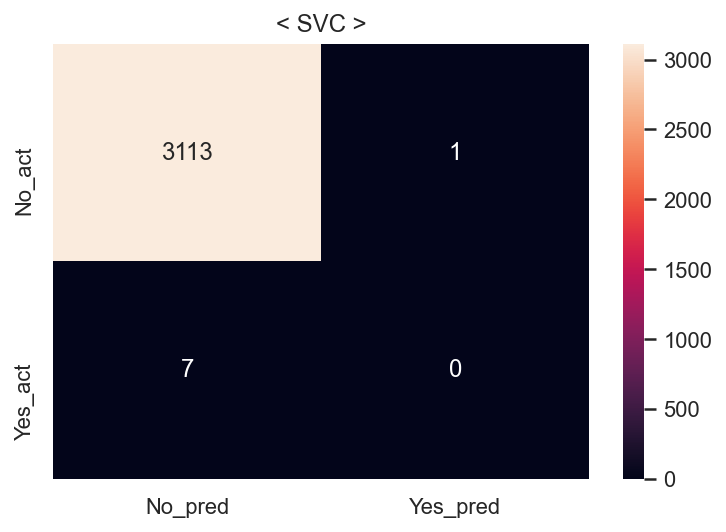

Fit time : 3.23 min


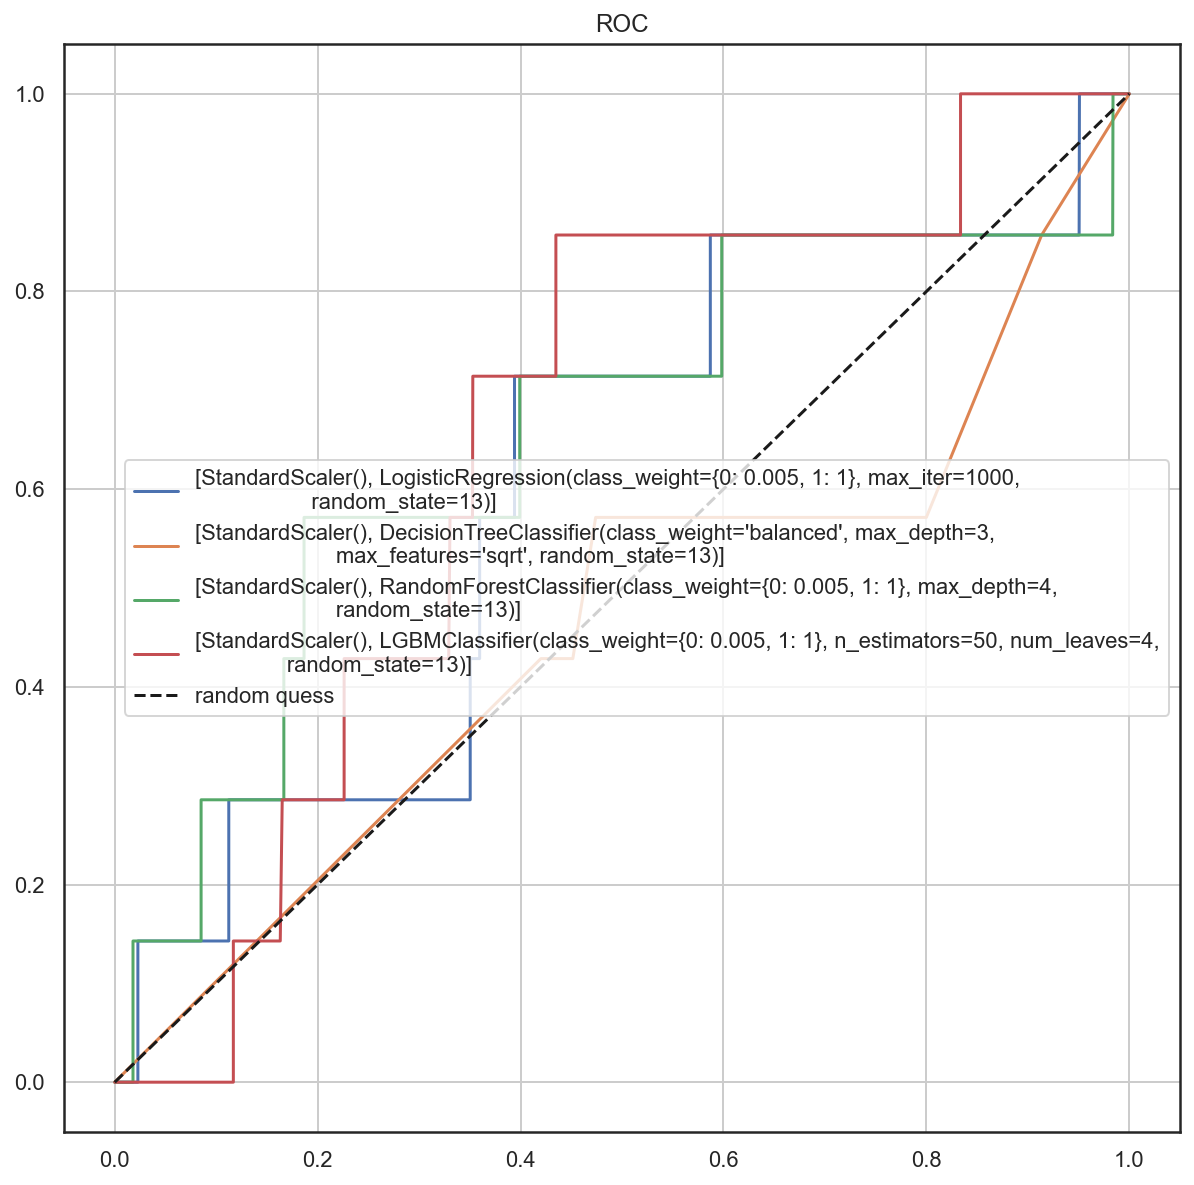

In [13]:
cv_list3, result_df3 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [14]:
result_df3["null_del"] = [1]  * len(result_df3)
result_df3["encoded"] = [1]  * len(result_df3)
result_df3["scaler"] = ["SD"]  * len(result_df3)
result_df3["sampler"] = ["BdlSMOTE"]  * len(result_df3)
result_df3 = result_df3[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df3

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1     SD  BdlSMOTE   LogisticReg        0.906553   
1         1        1     SD  BdlSMOTE  DecisionTree        0.786239   
2         1        1     SD  BdlSMOTE  RandomForest        0.896009   
3         1        1     SD  BdlSMOTE      LightGBM        0.909091   
4         1        1     SD  BdlSMOTE           SVC        0.998789   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.842986      0.999219  0.914478   0.906553       0.738225   
1         0.700844      0.998828  0.823715   0.786239       0.579622   
2         0.828209      0.999297  0.905745   0.896009       0.700096   
3         0.846429      0.999531  0.916631   0.909091       0.757129   
4         1.000000      0.997579  0.998788   0.998789       0.997437   

   test precision  test recall   test f1  test auc  
0        0.002457     0.285714  0.004872  0.512478  
1        0.002288     0.428571  0.004552  0.504266  
2        0.004269     0.571429  0.008475  0.635907  
3        0.003963     0.428571  0.007853  0.593220  
4        0.000000     0.000000  0.000000  0.499839

### (4) null_del = Y , encoded = Y , scaler = RB

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


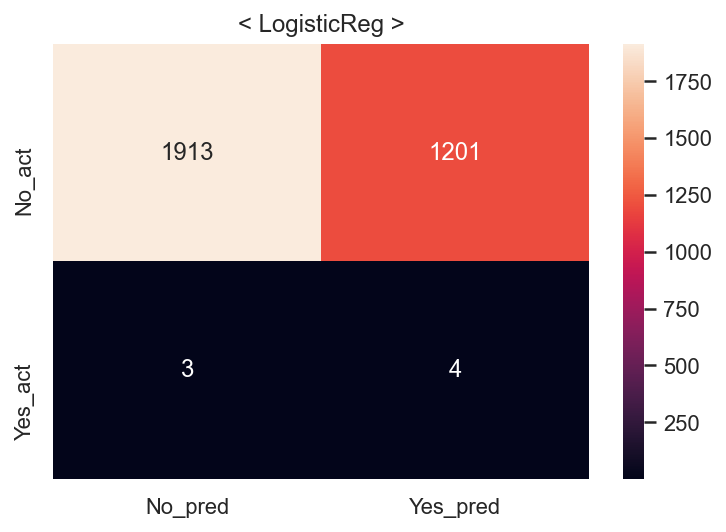

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


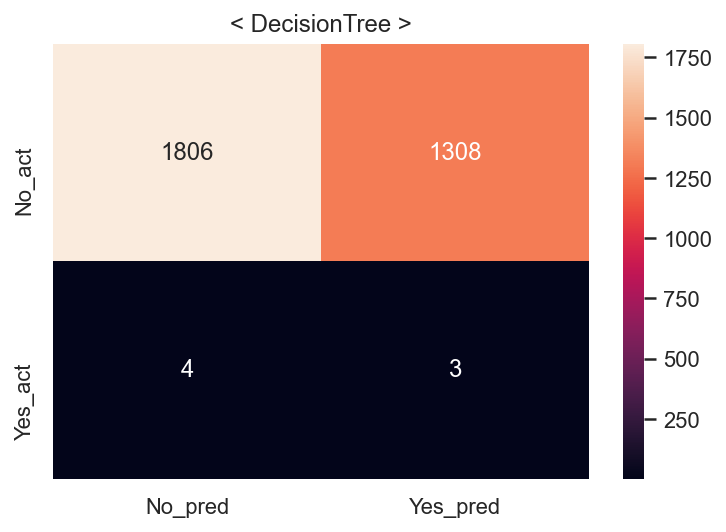

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


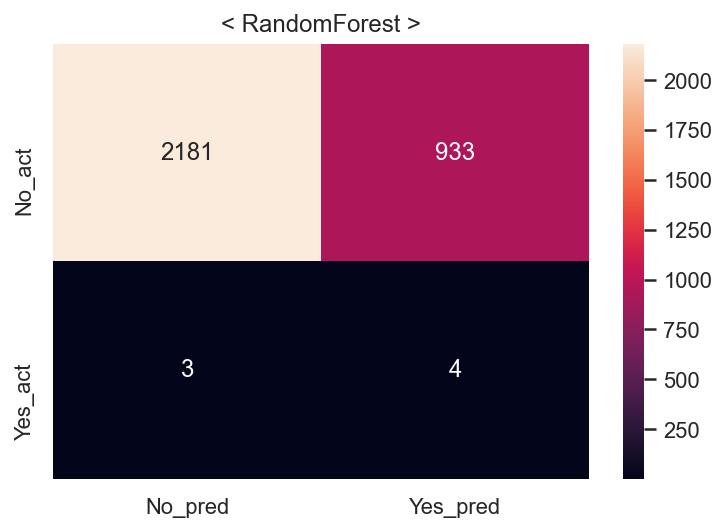

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


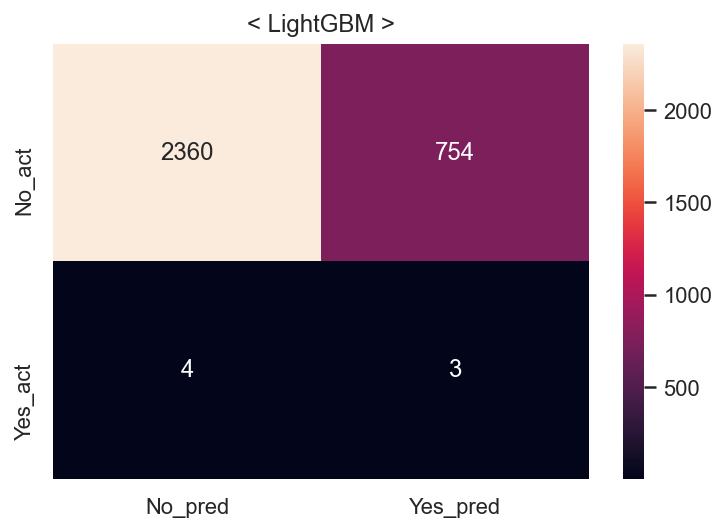

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  24.9s
====Done Evaluation====
====Done Evaluation====


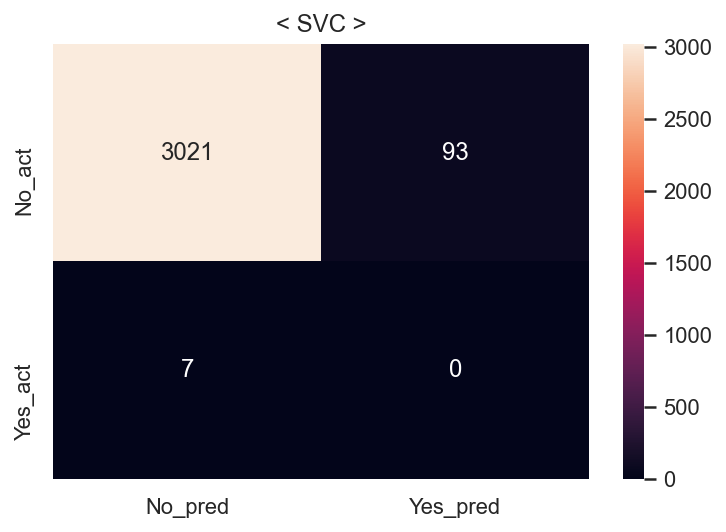

Fit time : 5.44 min


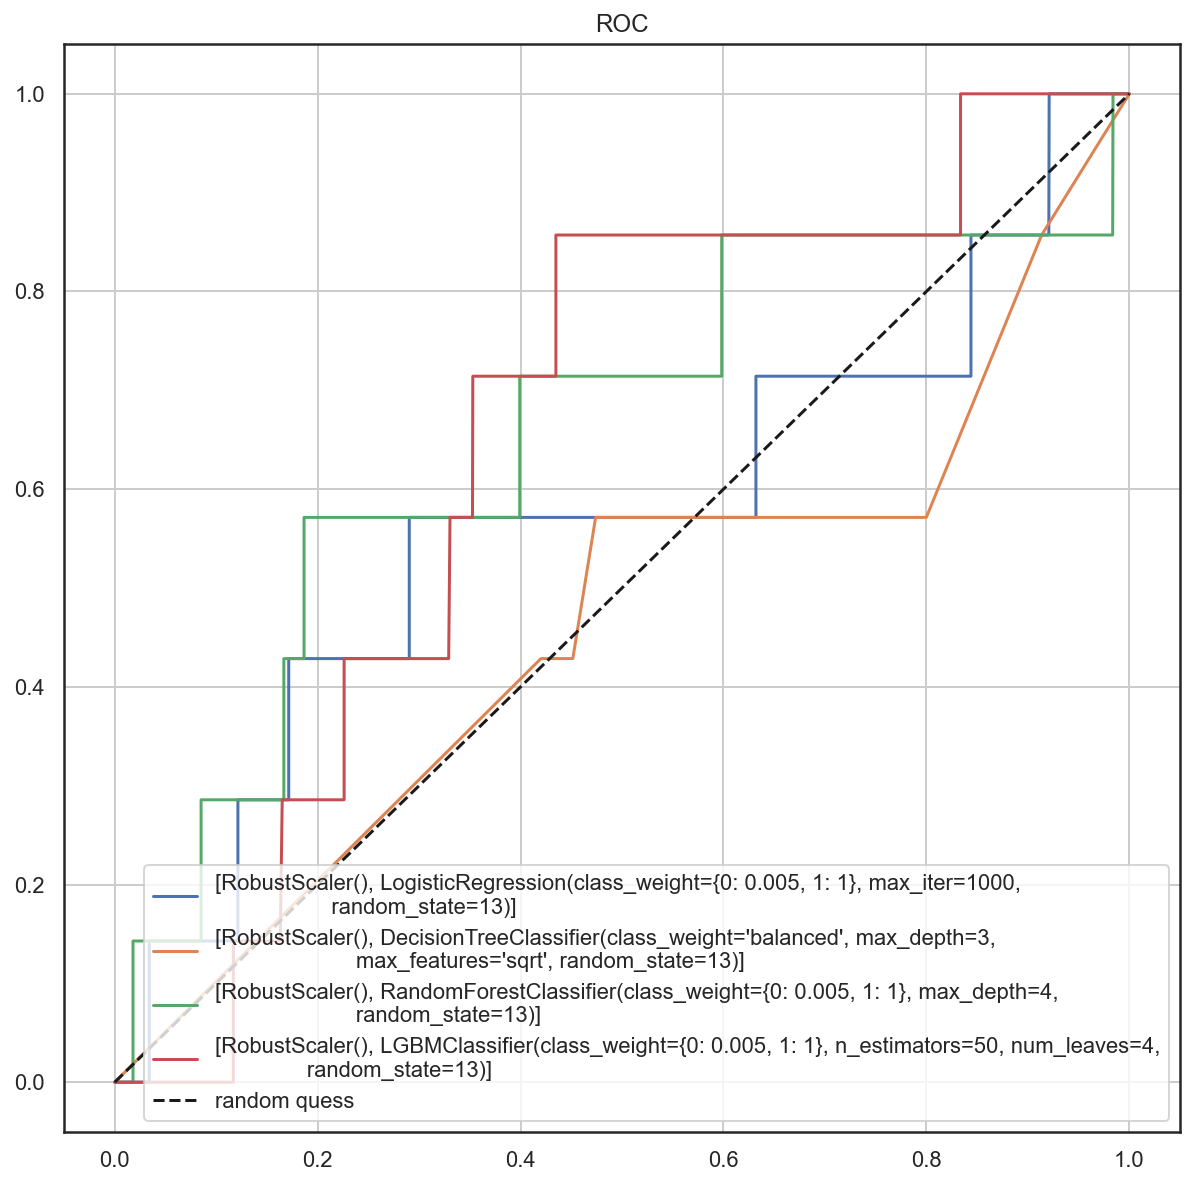

In [15]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df4 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [16]:
result_df4["null_del"] = [1]  * len(result_df4)
result_df4["encoded"] = [1]  * len(result_df4)
result_df4["scaler"] = ["RB"]  * len(result_df4)
result_df4["sampler"] = ["BdlSMOTE"]  * len(result_df4)
result_df4 = result_df3[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df4

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1     SD  BdlSMOTE   LogisticReg        0.906553   
1         1        1     SD  BdlSMOTE  DecisionTree        0.786239   
2         1        1     SD  BdlSMOTE  RandomForest        0.896009   
3         1        1     SD  BdlSMOTE      LightGBM        0.909091   
4         1        1     SD  BdlSMOTE           SVC        0.998789   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.842986      0.999219  0.914478   0.906553       0.738225   
1         0.700844      0.998828  0.823715   0.786239       0.579622   
2         0.828209      0.999297  0.905745   0.896009       0.700096   
3         0.846429      0.999531  0.916631   0.909091       0.757129   
4         1.000000      0.997579  0.998788   0.998789       0.997437   

   test precision  test recall   test f1  test auc  
0        0.002457     0.285714  0.004872  0.512478  
1        0.002288     0.428571  0.004552  0.504266  
2        0.004269     0.571429  0.008475  0.635907  
3        0.003963     0.428571  0.007853  0.593220  
4        0.000000     0.000000  0.000000  0.499839

### (5) null_del = Y , encoded = N , scaler = None

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.8s
====Done Evaluation====
====Done Evaluation====


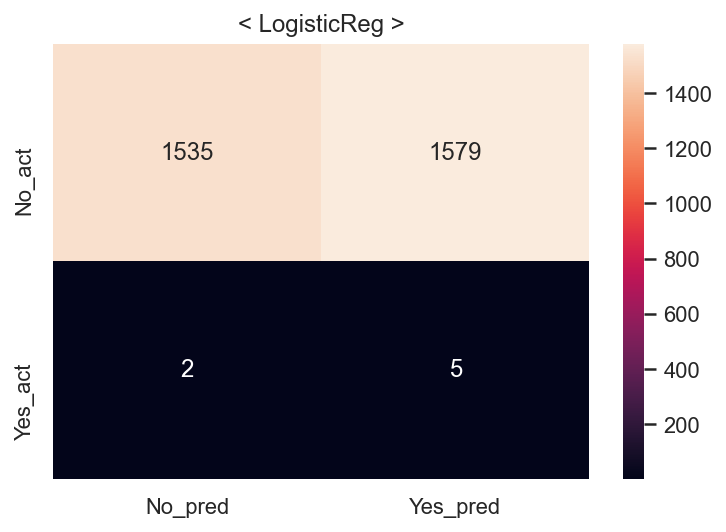

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


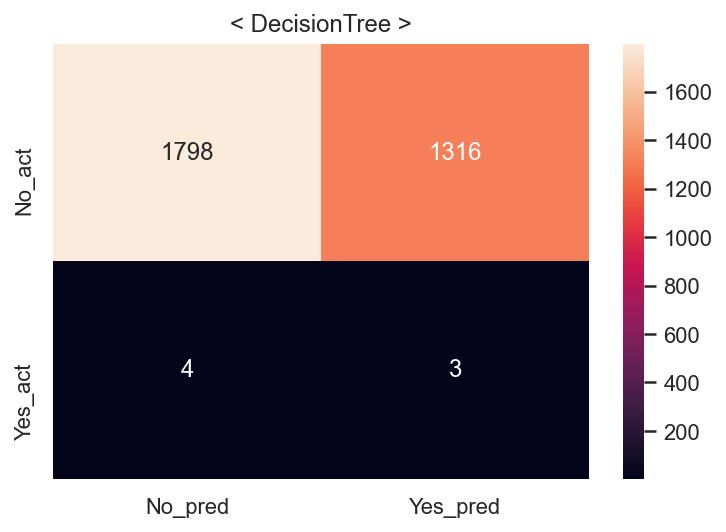

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.6s
====Done Evaluation====
====Done Evaluation====


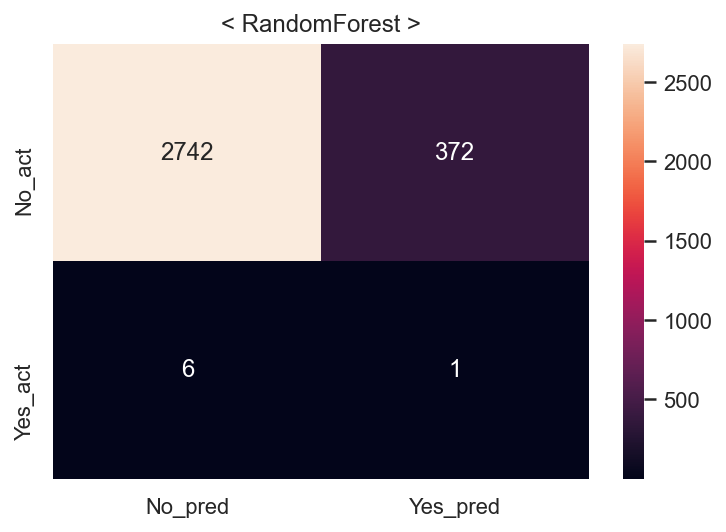

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


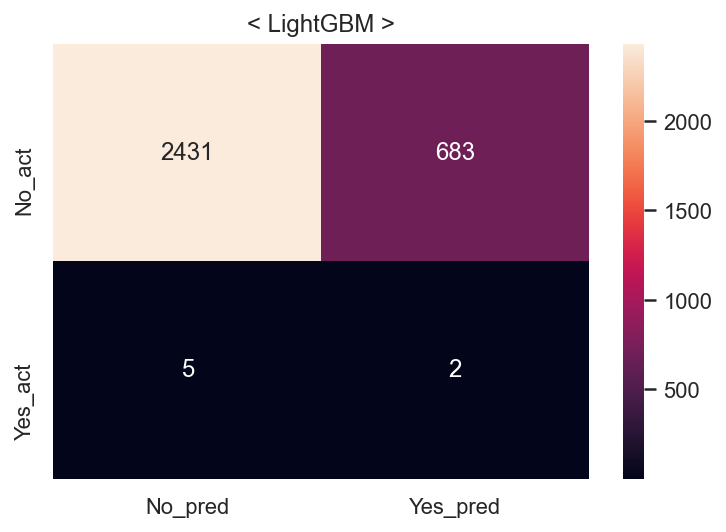

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  33.0s
====Done Evaluation====
====Done Evaluation====


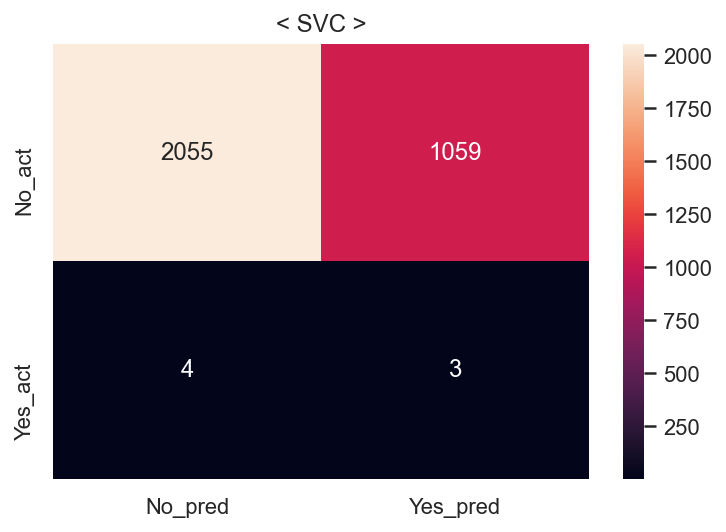

Fit time : 5.93 min


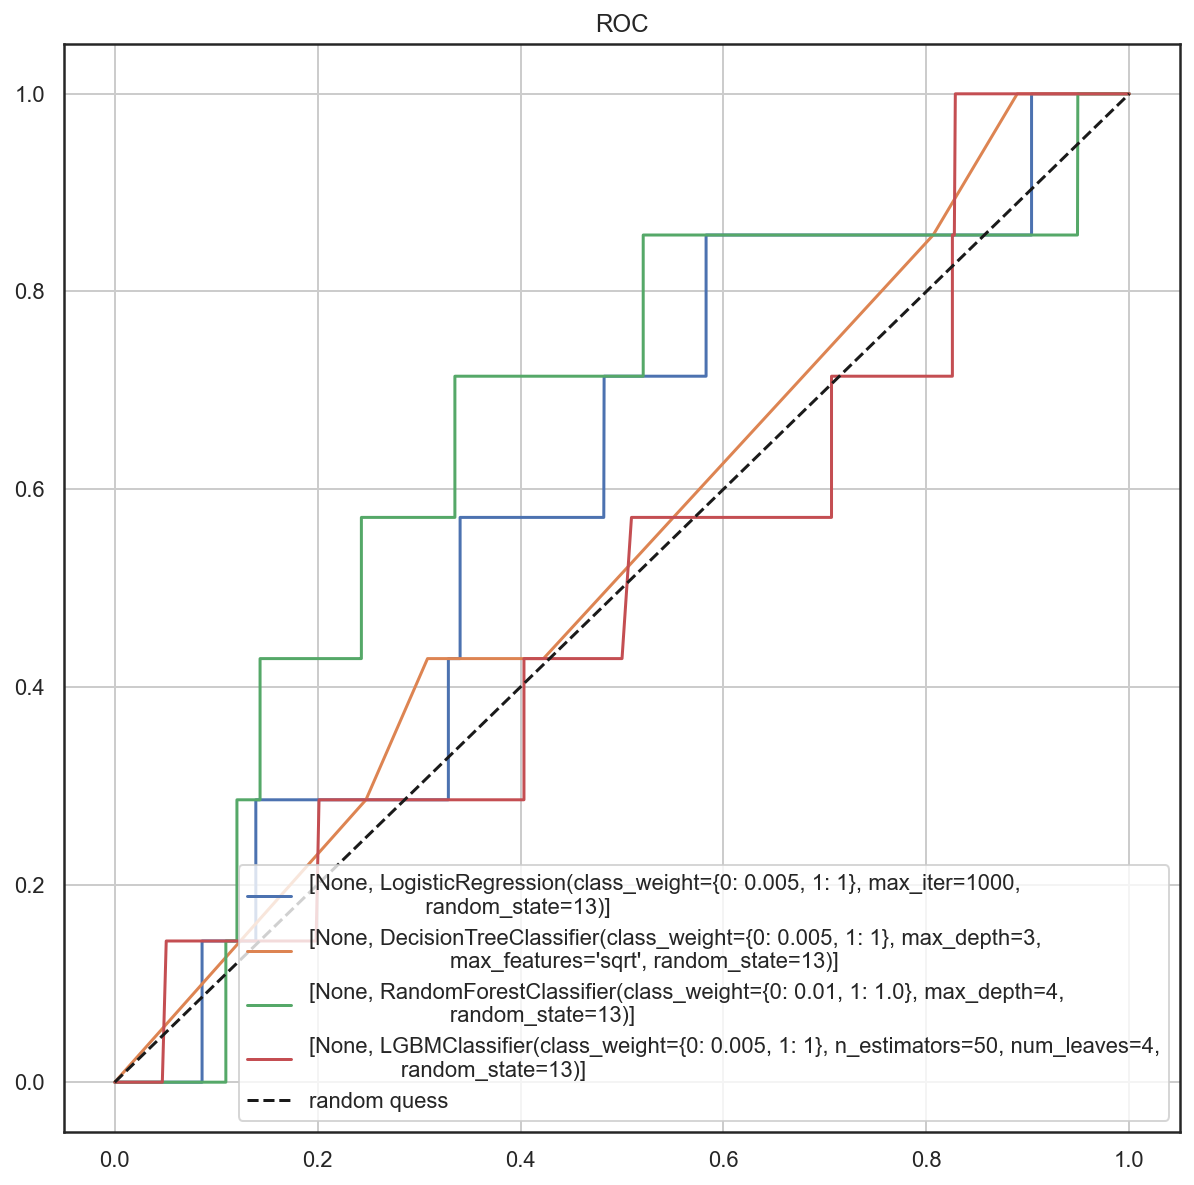

In [17]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list5, result_df5 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [18]:
result_df5["null_del"] = [1]  * len(result_df5)
result_df5["encoded"] = [0]  * len(result_df5)
result_df5["scaler"] = ["None"]  * len(result_df5)
result_df5["sampler"] = ["BdlSMOTE"]  * len(result_df5)
result_df5 = result_df5[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df5

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0   None  BdlSMOTE   LogisticReg        0.744806   
1         1        0   None  BdlSMOTE  DecisionTree        0.784013   
2         1        0   None  BdlSMOTE  RandomForest        0.934864   
3         1        0   None  BdlSMOTE      LightGBM        0.899836   
4         1        0   None  BdlSMOTE           SVC        0.829702   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.662283      0.999063  0.796538   0.744806       0.493432   
1         0.698618      0.998985  0.822229   0.784013       0.577059   
2         0.886184      0.997891  0.938726   0.934864       0.878885   
3         0.833453      0.999375  0.908904   0.899836       0.779558   
4         0.746569      0.998282  0.854269   0.829702       0.659404   

   test precision  test recall   test f1  test auc  
0        0.003157     0.714286  0.006285  0.603610  
1        0.002274     0.428571  0.004525  0.502982  
2        0.002681     0.142857  0.005263  0.511698  
3        0.002920     0.285714  0.005780  0.533191  
4        0.002825     0.428571  0.005613  0.544247

### (6) null_del = Y , encoded = N , scaler = MM

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


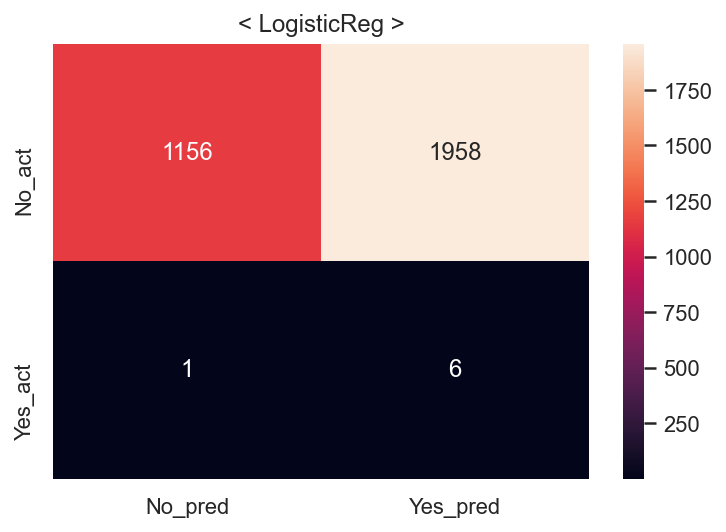

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


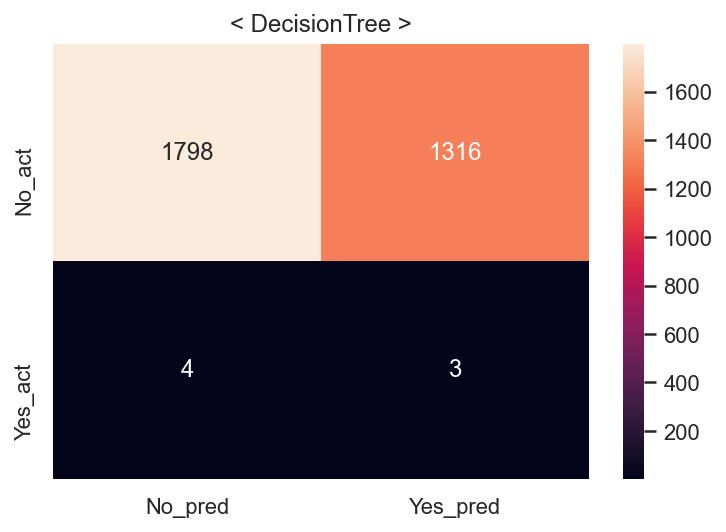

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.6s
====Done Evaluation====
====Done Evaluation====


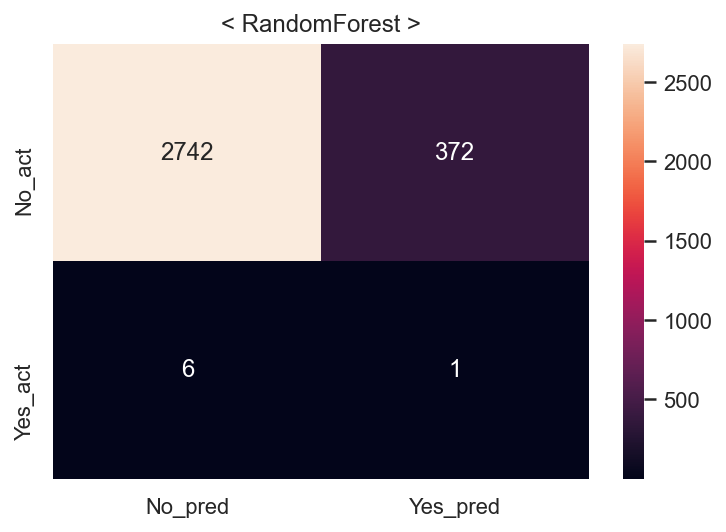

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


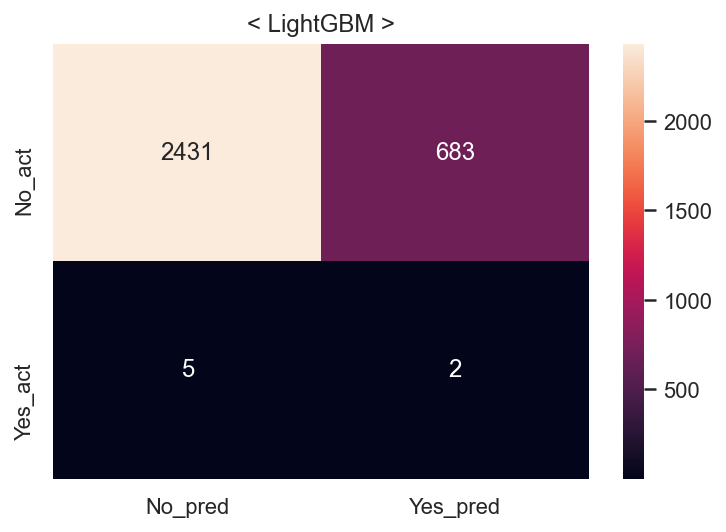

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   4.3s
====Done Evaluation====
====Done Evaluation====


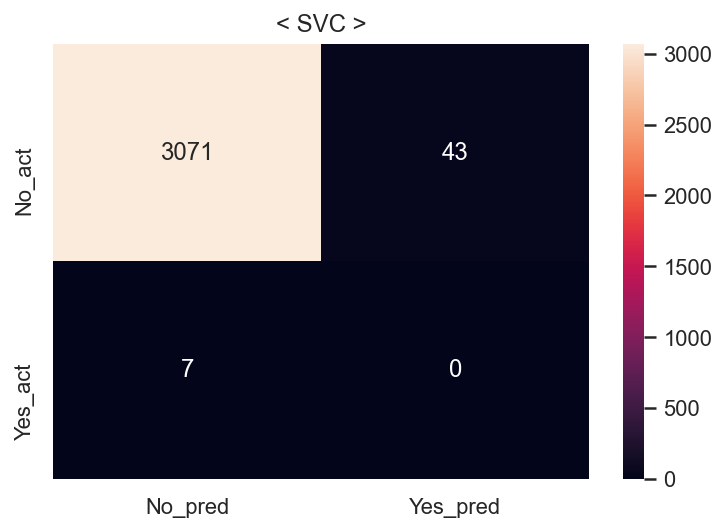

Fit time : 2.66 min


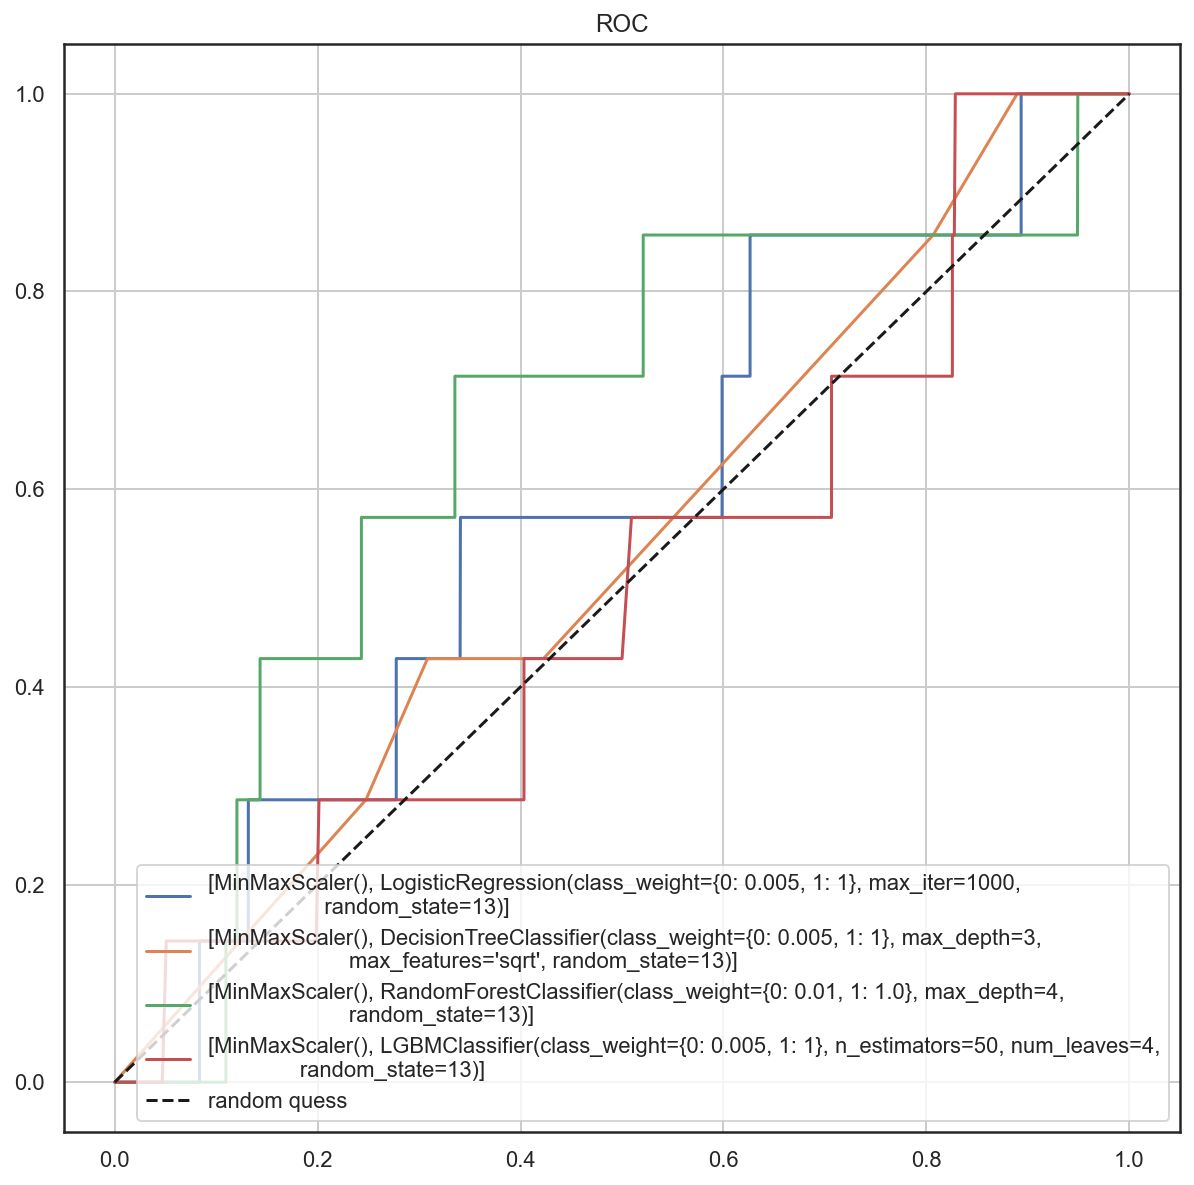

In [19]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list6, result_df6 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [20]:
result_df6["null_del"] = [1]  * len(result_df6)
result_df6["encoded"] = [0]  * len(result_df6)
result_df6["scaler"] = ["MM"]  * len(result_df6)
result_df6["sampler"] = ["BdlSMOTE"]  * len(result_df6)
result_df6 = result_df6[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df6

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0     MM  BdlSMOTE   LogisticReg        0.679007   
1         1        0     MM  BdlSMOTE  DecisionTree        0.784013   
2         1        0     MM  BdlSMOTE  RandomForest        0.934864   
3         1        0     MM  BdlSMOTE      LightGBM        0.899836   
4         1        0     MM  BdlSMOTE           SVC        0.989925   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.609122      0.999219  0.756862   0.679007       0.372317   
1         0.698618      0.998985  0.822229   0.784013       0.577059   
2         0.886184      0.997891  0.938726   0.934864       0.878885   
3         0.833453      0.999375  0.908904   0.899836       0.779558   
4         0.982687      0.997423  0.990000   0.989925       0.983979   

   test precision  test recall   test f1  test auc  
0        0.003055     0.857143  0.006088  0.614185  
1        0.002274     0.428571  0.004525  0.502982  
2        0.002681     0.142857  0.005263  0.511698  
3        0.002920     0.285714  0.005780  0.533191  
4        0.000000     0.000000  0.000000  0.493096

### (7) null_del = Y , encoded = N , scaler = SD

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


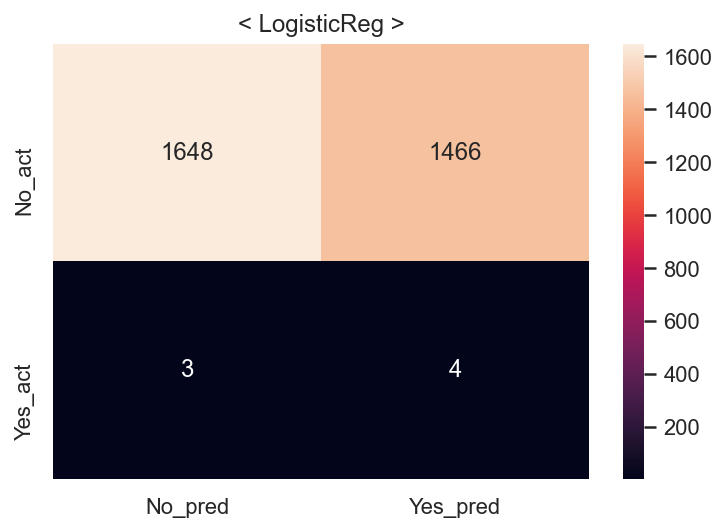

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


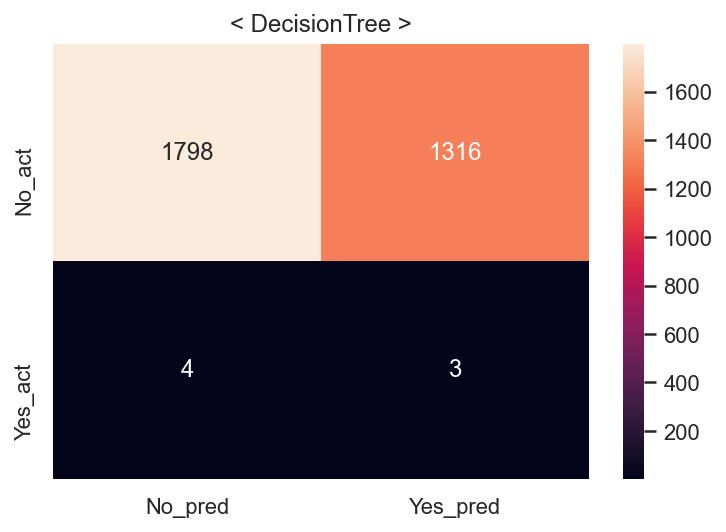

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


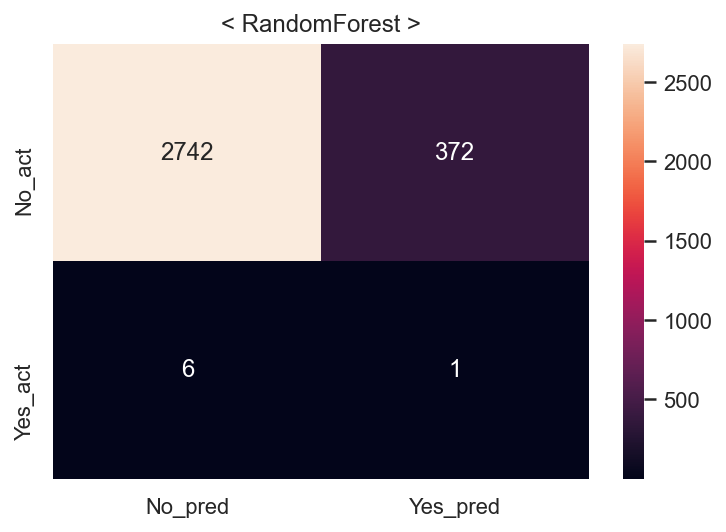

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


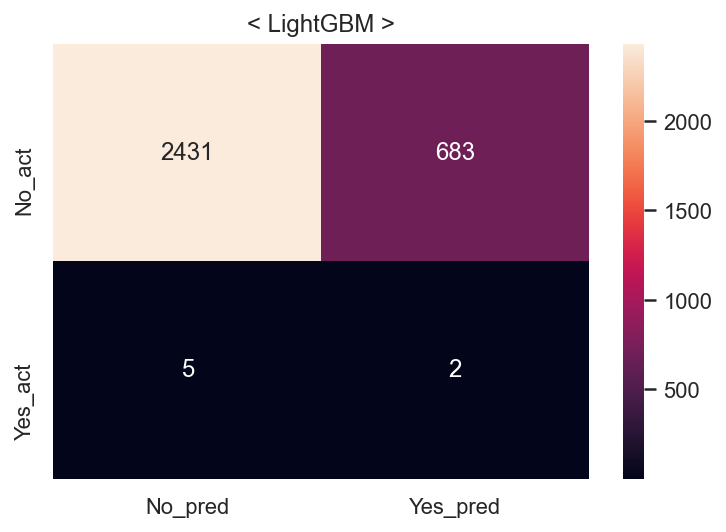

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   2.0s
====Done Evaluation====
====Done Evaluation====


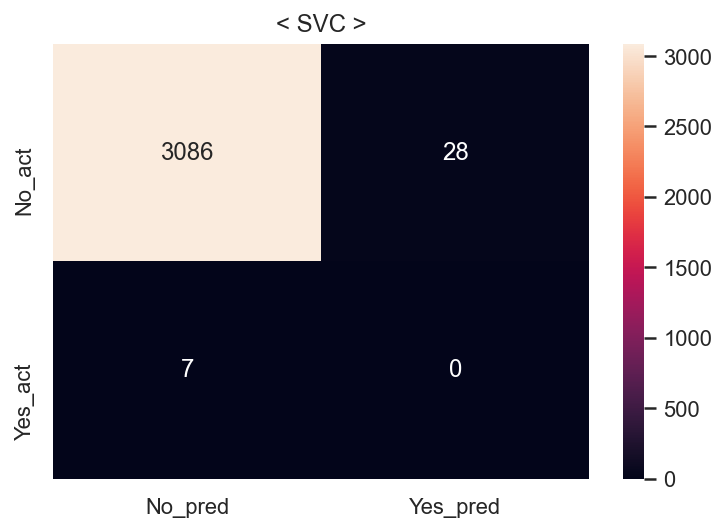

Fit time : 2.57 min


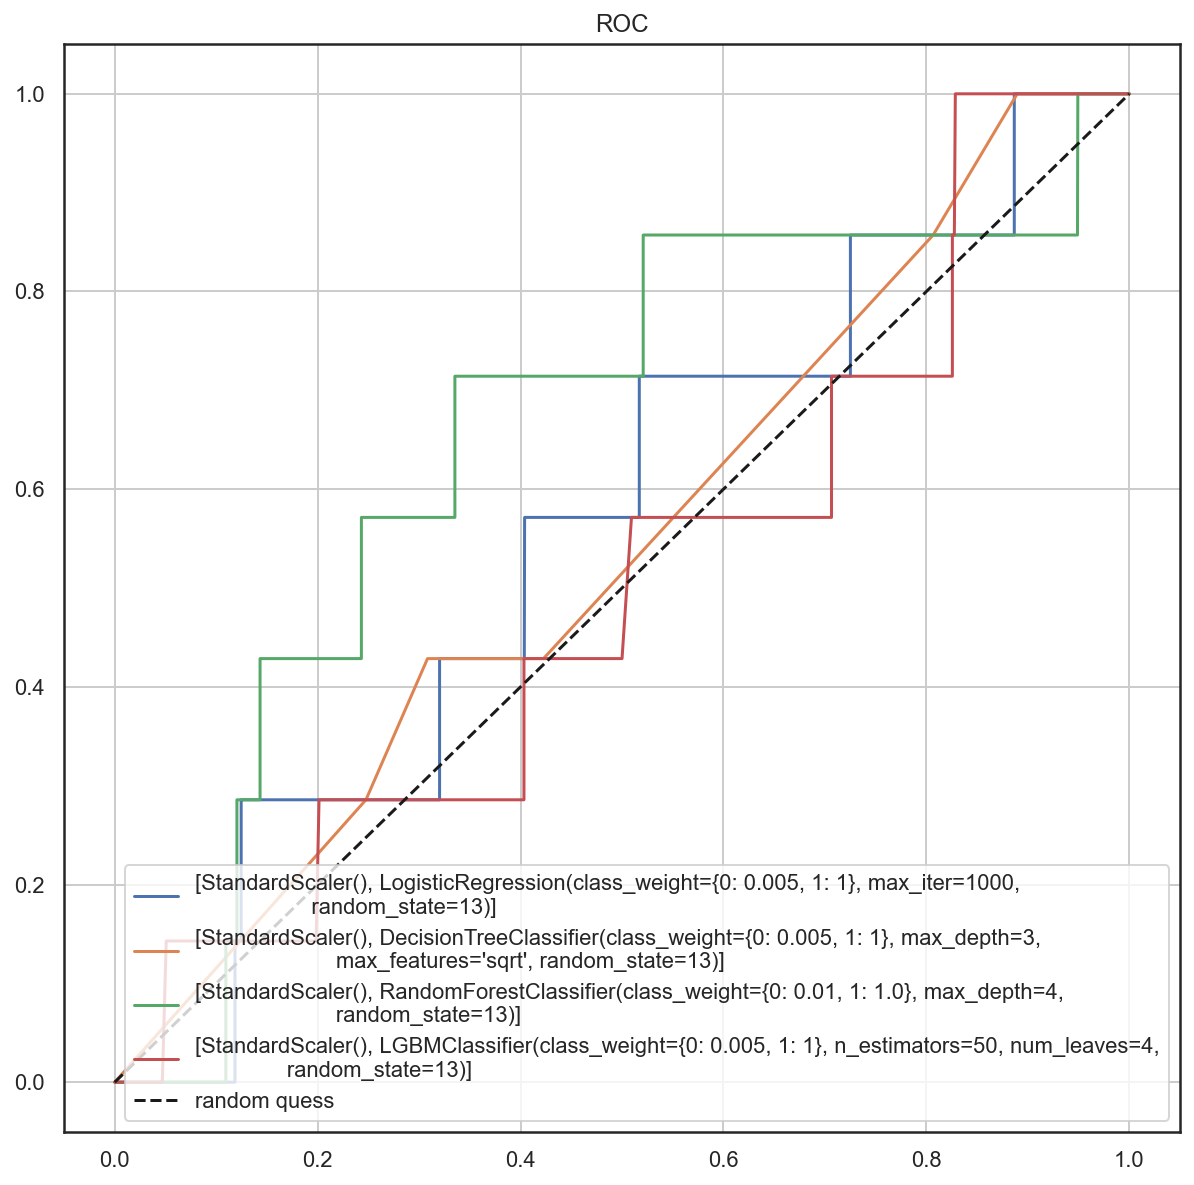

In [21]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list7, result_df7 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [22]:
result_df7["null_del"] = [1]  * len(result_df7)
result_df7["encoded"] = [0]  * len(result_df7)
result_df7["scaler"] = ["SD"]  * len(result_df7)
result_df7["sampler"] = ["BdlSMOTE"]  * len(result_df7)
result_df7 = result_df7[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df7

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0     SD  BdlSMOTE   LogisticReg        0.759450   
1         1        0     SD  BdlSMOTE  DecisionTree        0.784013   
2         1        0     SD  BdlSMOTE  RandomForest        0.934864   
3         1        0     SD  BdlSMOTE      LightGBM        0.899836   
4         1        0     SD  BdlSMOTE           SVC        0.994611   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.675433      0.998907  0.805923   0.759450       0.529318   
1         0.698618      0.998985  0.822229   0.784013       0.577059   
2         0.886184      0.997891  0.938726   0.934864       0.878885   
3         0.833453      0.999375  0.908904   0.899836       0.779558   
4         0.991845      0.997423  0.994626   0.994611       0.988786   

   test precision  test recall   test f1  test auc  
0        0.002721     0.571429  0.005416  0.550326  
1        0.002274     0.428571  0.004525  0.502982  
2        0.002681     0.142857  0.005263  0.511698  
3        0.002920     0.285714  0.005780  0.533191  
4        0.000000     0.000000  0.000000  0.495504

### (8) null_del = Y , encoded = N , scaler = RB

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


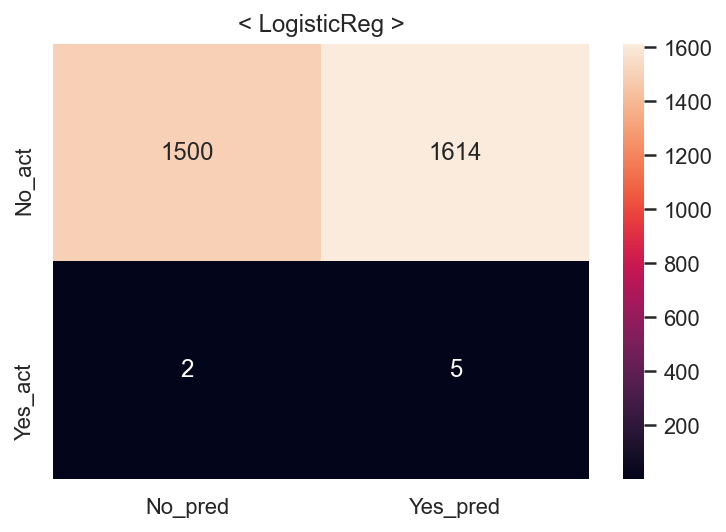

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


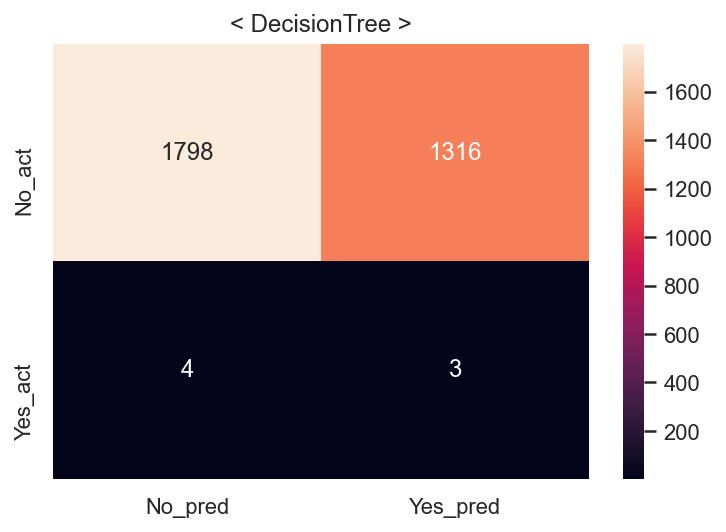

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.6s
====Done Evaluation====
====Done Evaluation====


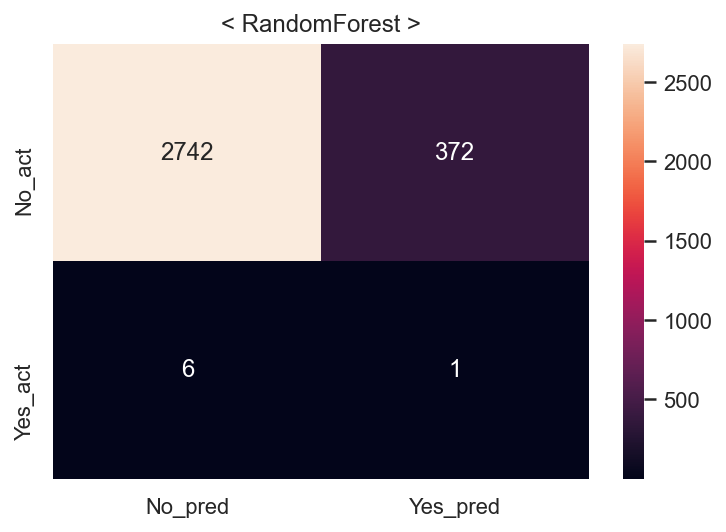

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


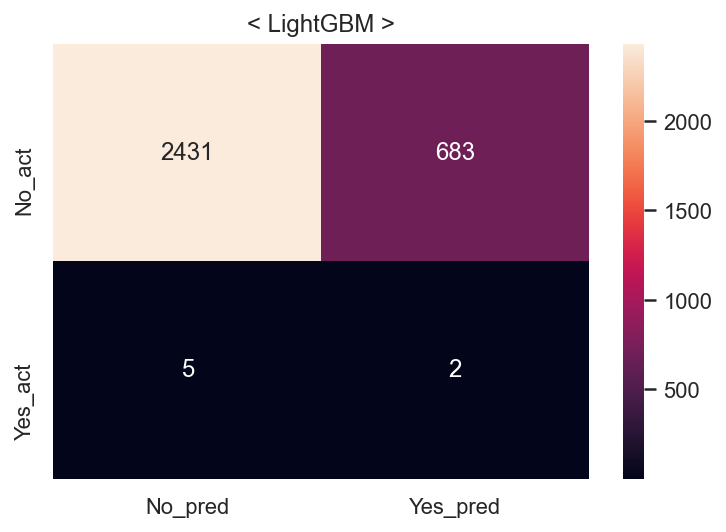

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  19.6s
====Done Evaluation====
====Done Evaluation====


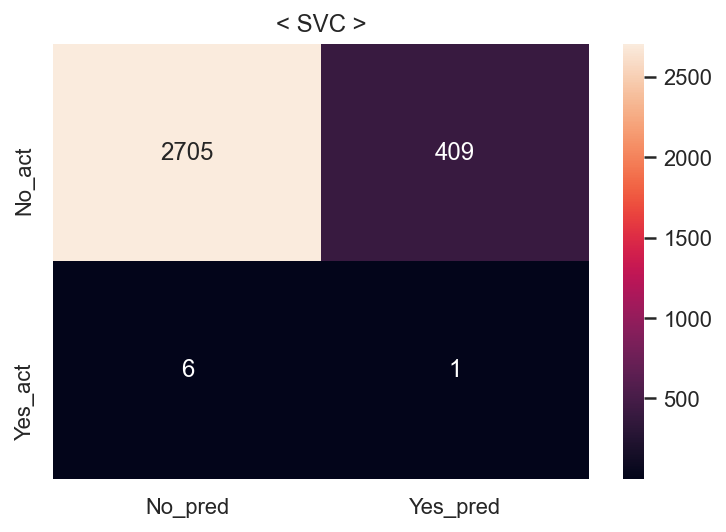

Fit time : 3.97 min


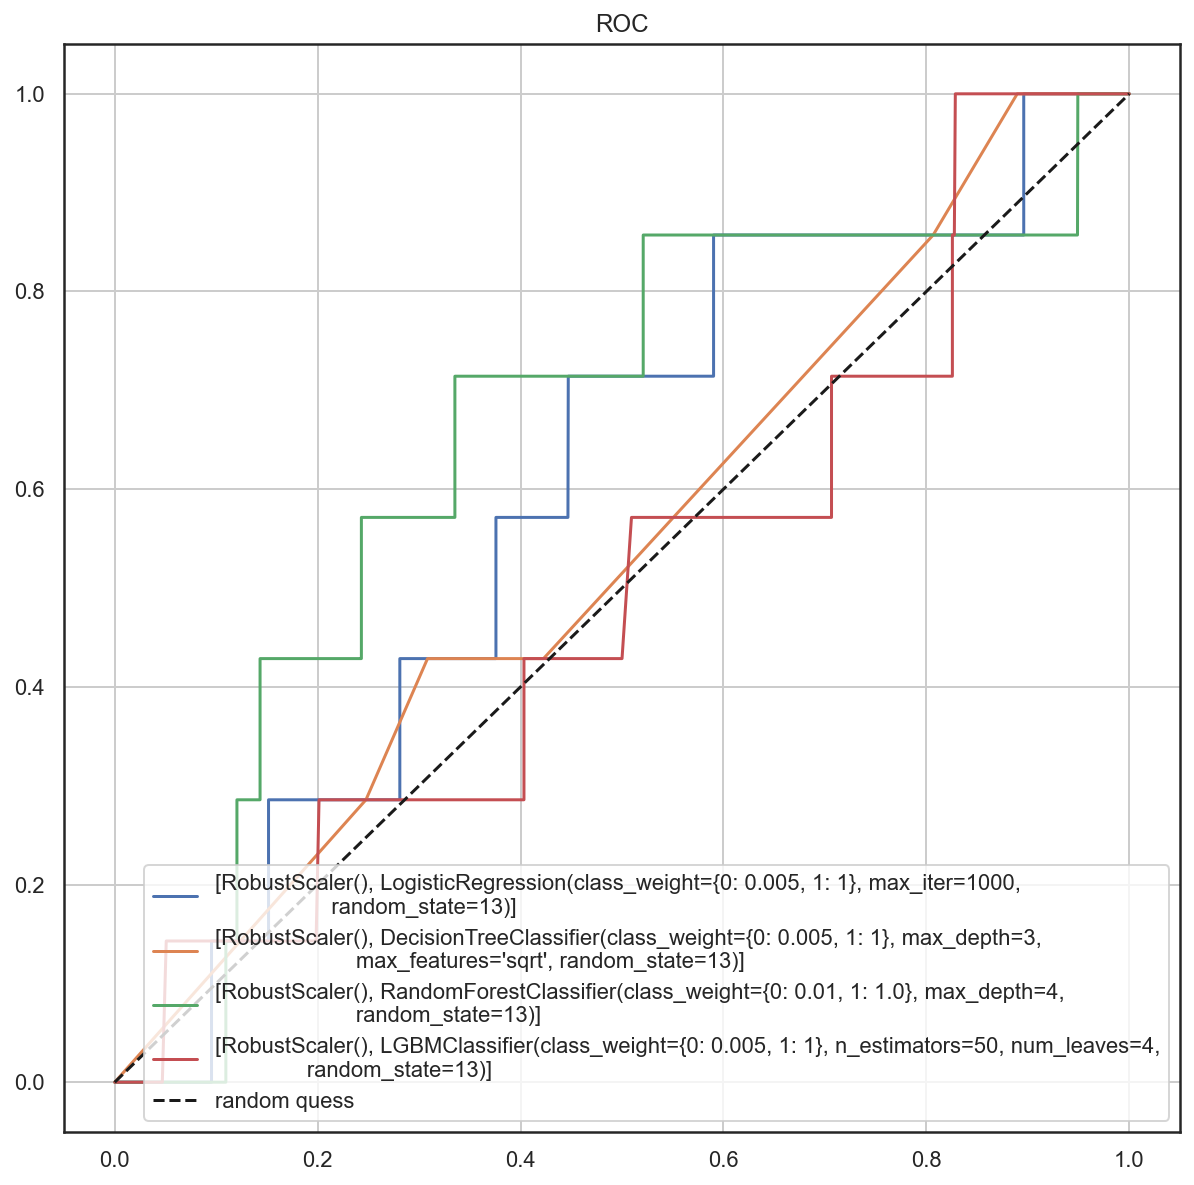

In [23]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list8, result_df8 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [24]:
result_df8["null_del"] = [1] * len(result_df8)
result_df8["encoded"] = [0]  * len(result_df8)
result_df8["scaler"] = ["RB"]  * len(result_df8)
result_df8["sampler"] = ["BdlSMOTE"]  * len(result_df8)
result_df8 = result_df8[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df8

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0     RB  BdlSMOTE   LogisticReg        0.740901   
1         1        0     RB  BdlSMOTE  DecisionTree        0.784013   
2         1        0     RB  BdlSMOTE  RandomForest        0.934864   
3         1        0     RB  BdlSMOTE      LightGBM        0.899836   
4         1        0     RB  BdlSMOTE           SVC        0.937012   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.658856      0.999141  0.794078   0.740901       0.482217   
1         0.698618      0.998985  0.822229   0.784013       0.577059   
2         0.886184      0.997891  0.938726   0.934864       0.878885   
3         0.833453      0.999375  0.908904   0.899836       0.779558   
4         0.889632      0.997813  0.940622   0.937012       0.867030   

   test precision  test recall   test f1  test auc  
0        0.003088     0.714286  0.006150  0.597991  
1        0.002274     0.428571  0.004525  0.502982  
2        0.002681     0.142857  0.005263  0.511698  
3        0.002920     0.285714  0.005780  0.533191  
4        0.002439     0.142857  0.004796  0.505757

### (9) null_del = N , encoded = Y , scaler = No

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


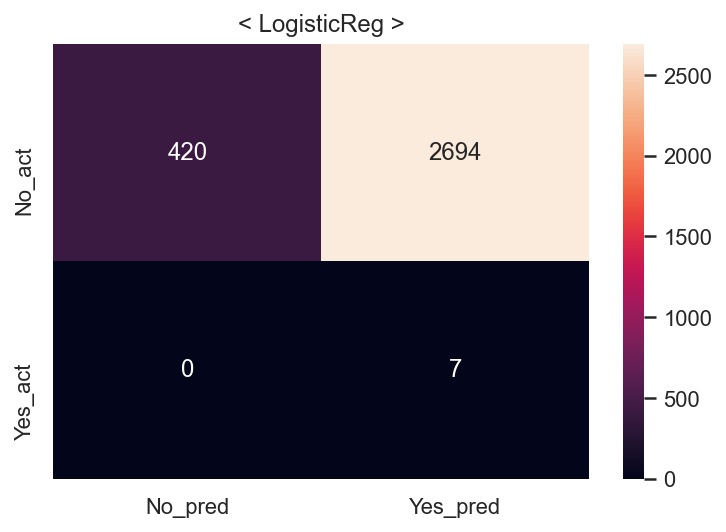

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


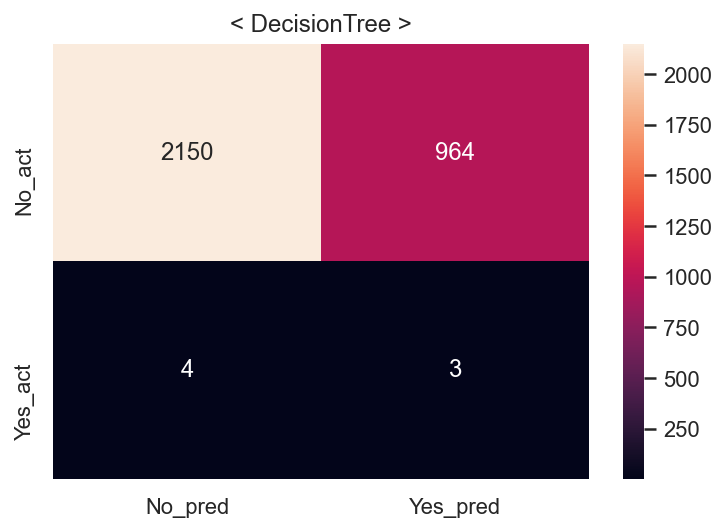

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.8s
====Done Evaluation====
====Done Evaluation====


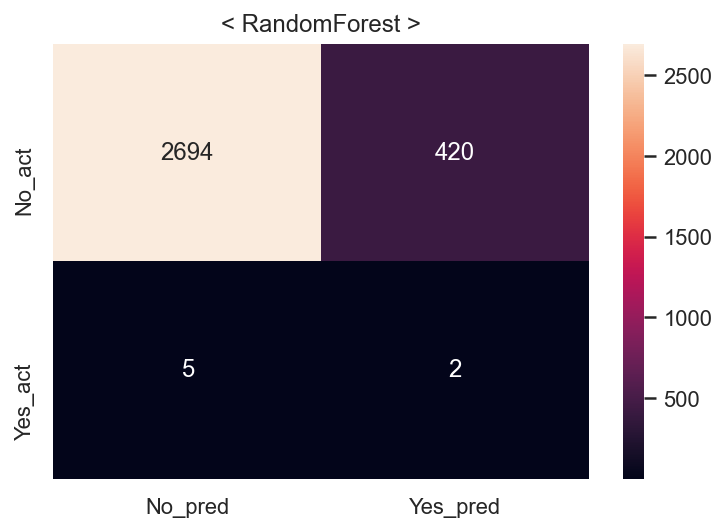

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


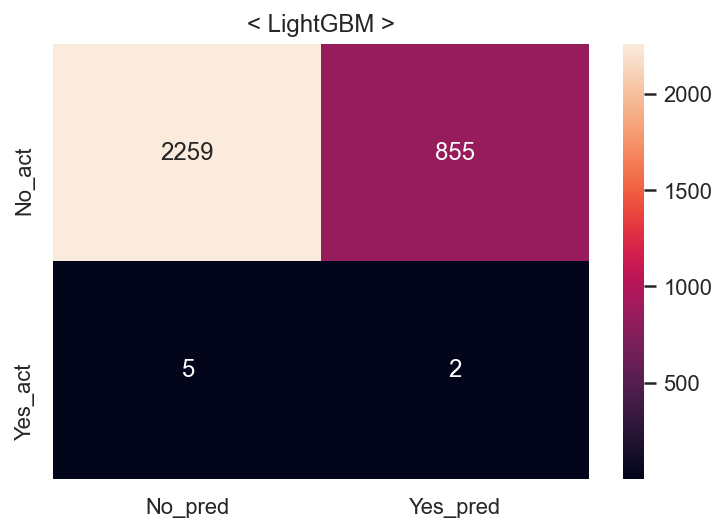

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  35.6s
====Done Evaluation====
====Done Evaluation====


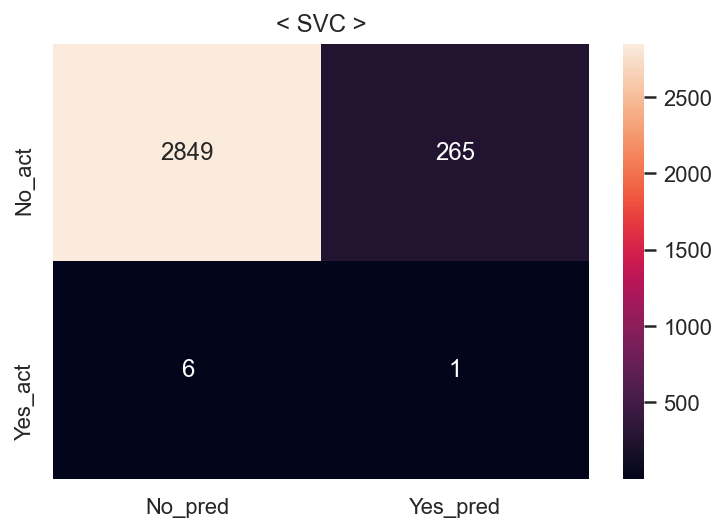

Fit time : 7.33 min


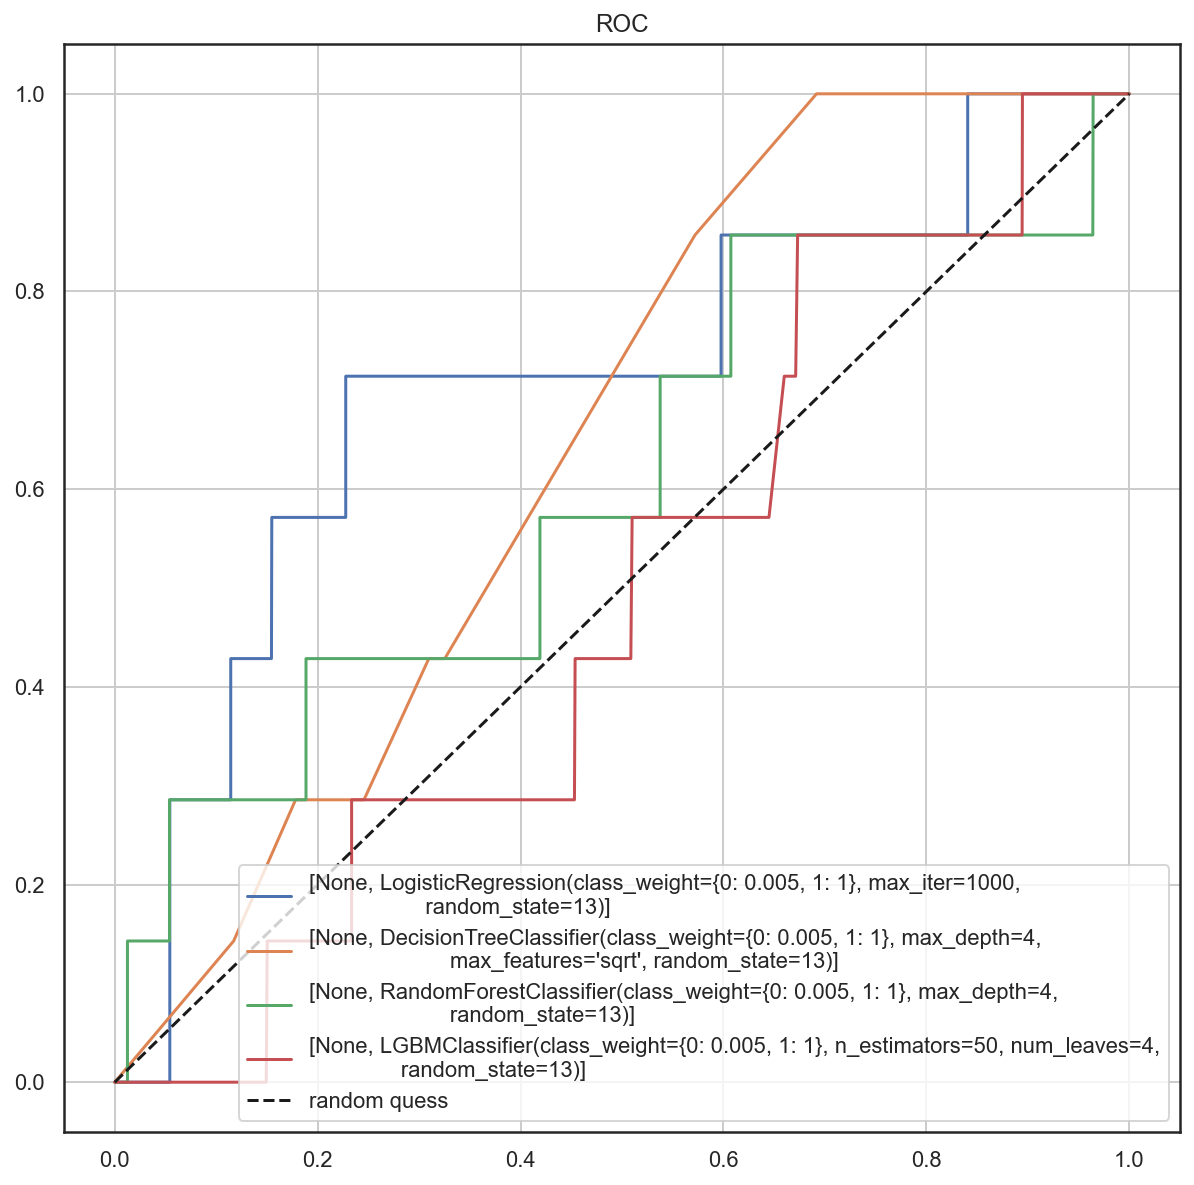

In [25]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list9, result_df9 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [26]:
result_df9["null_del"] = [0] * len(result_df9)
result_df9["encoded"] = [1]  * len(result_df9)
result_df9["scaler"] = ["None"]  * len(result_df9)
result_df9["sampler"] = ["BdlSMOTE"]  * len(result_df9)
result_df9 = result_df9[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df9

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1   None  BdlSMOTE   LogisticReg        0.562285   
1         0        1   None  BdlSMOTE  DecisionTree        0.899563   
2         0        1   None  BdlSMOTE  RandomForest        0.965167   
3         0        1   None  BdlSMOTE      LightGBM        0.878788   
4         0        1   None  BdlSMOTE           SVC        0.934864   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.533225      0.999609  0.695466   0.562285       0.136815   
1         0.833203      0.999141  0.908658   0.899563       0.689843   
2         0.936018      0.998594  0.966294   0.965167       0.863826   
3         0.805262      0.999219  0.891817   0.878788       0.724447   
4         0.918395      0.954545  0.936121   0.934864       0.913169   

   test precision  test recall   test f1  test auc  
0        0.002592     1.000000  0.005170  0.567437  
1        0.003102     0.428571  0.006160  0.559501  
2        0.004739     0.285714  0.009324  0.575420  
3        0.002334     0.285714  0.004630  0.505574  
4        0.003759     0.142857  0.007326  0.528879

### (10) null_del = N , encoded = Y , scaler = MM

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


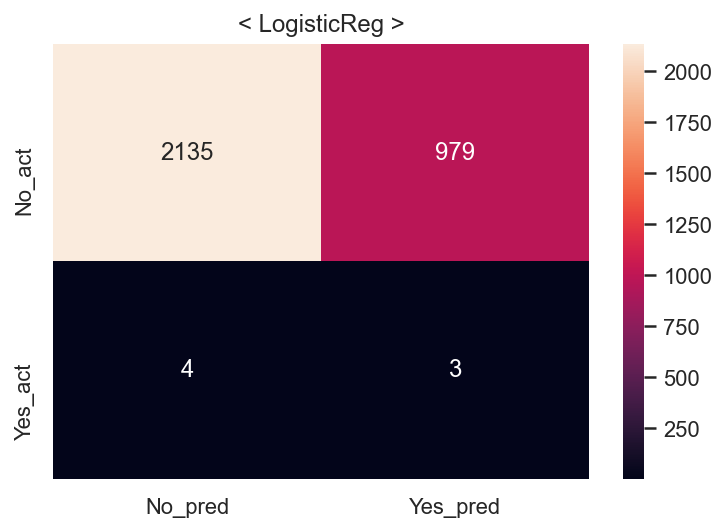

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


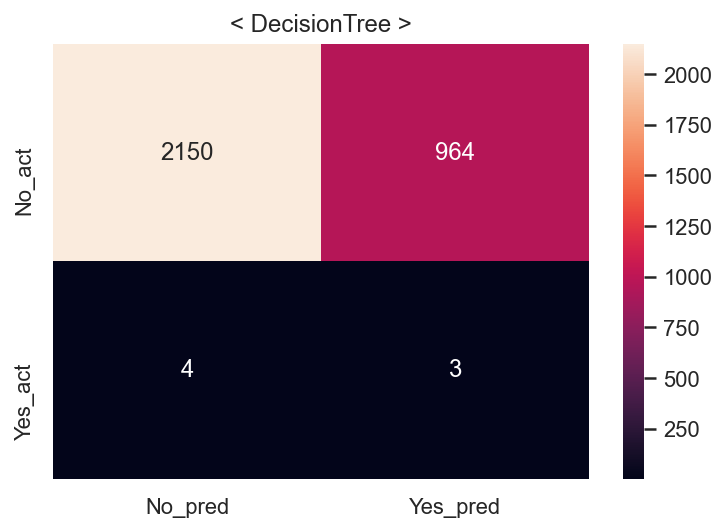

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


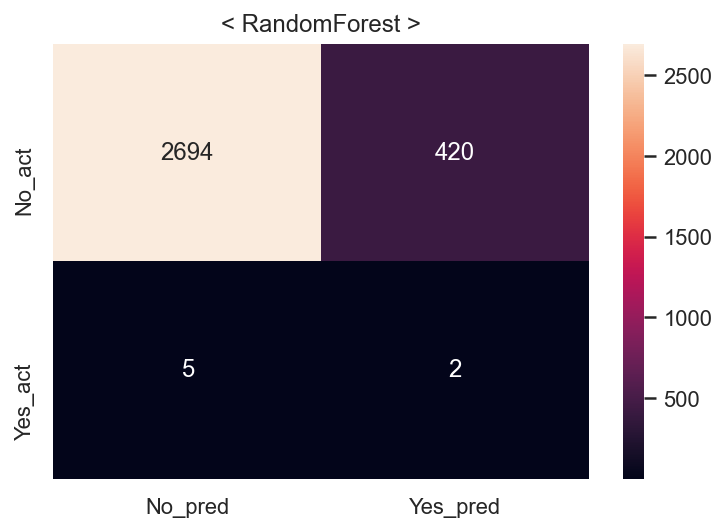

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


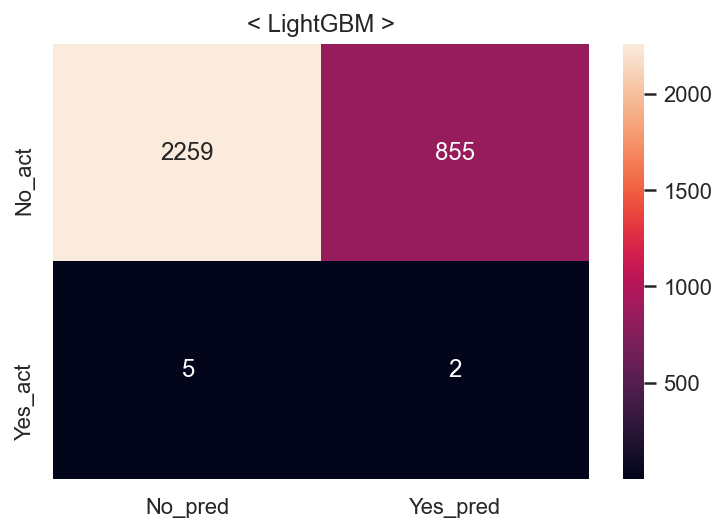

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.0s
====Done Evaluation====
====Done Evaluation====


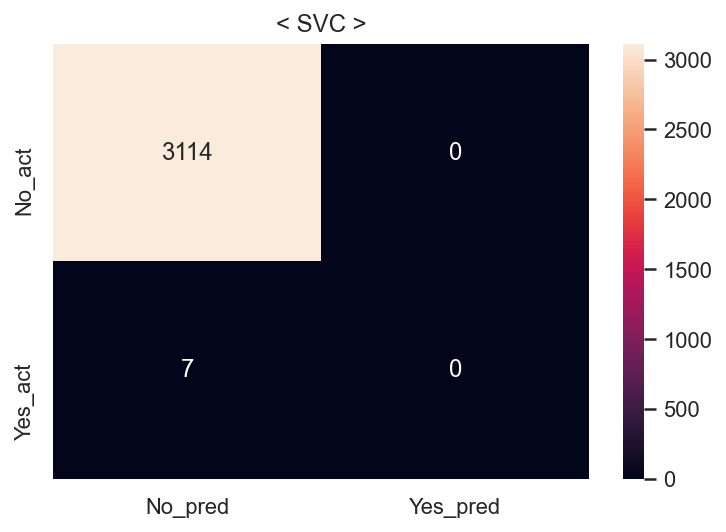

Fit time : 2.99 min


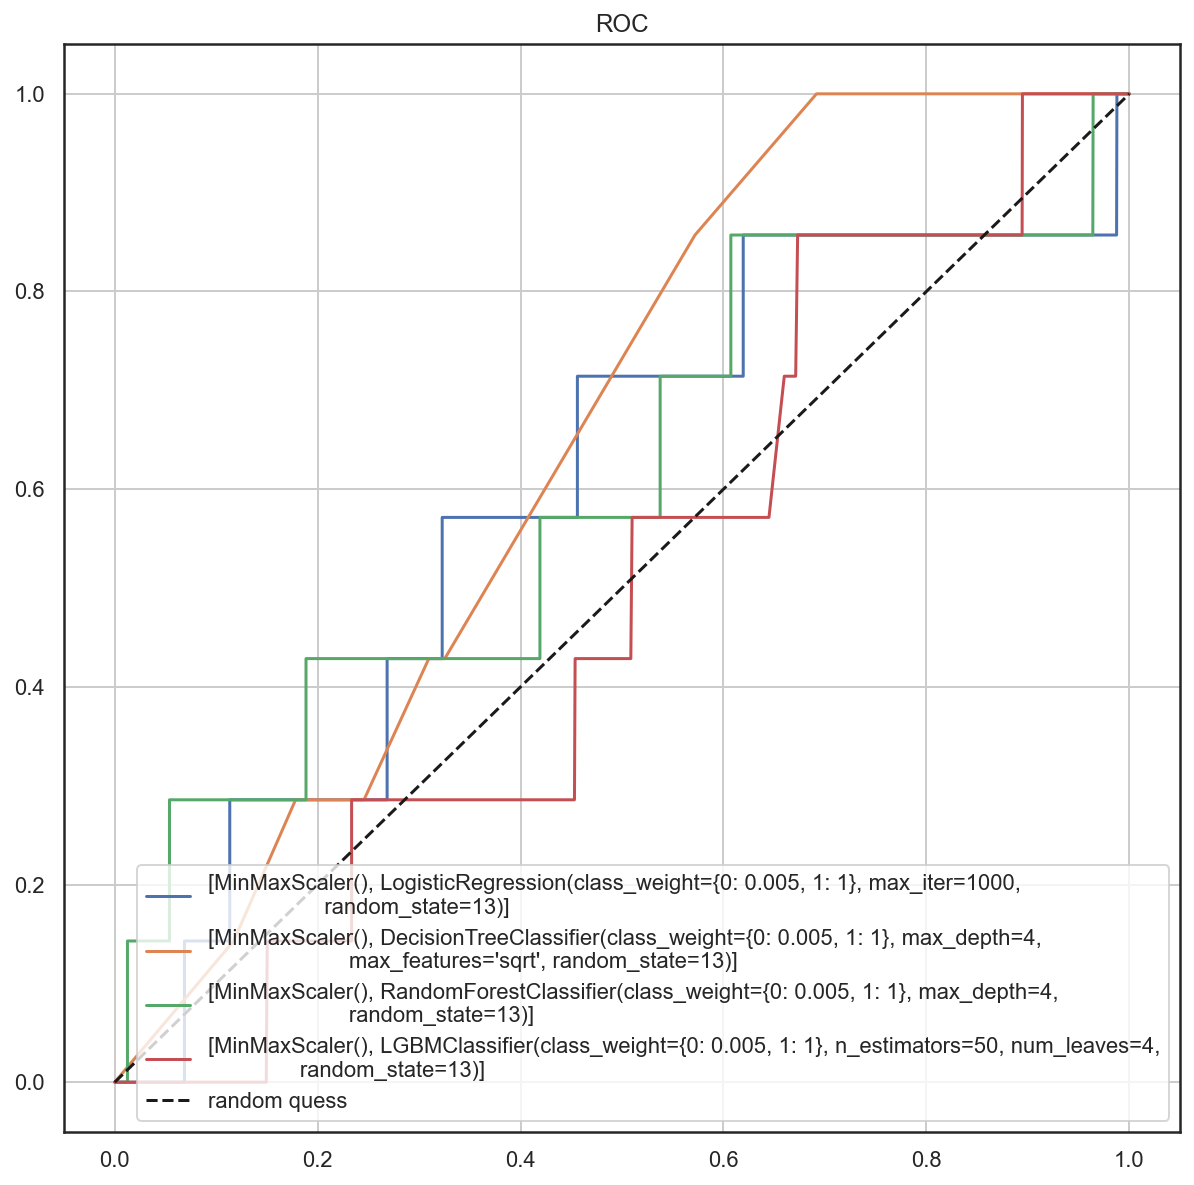

In [27]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list10, result_df10 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [28]:
result_df10["null_del"] = [0] * len(result_df10)
result_df10["encoded"] = [1]  * len(result_df10)
result_df10["scaler"] = ["MM"]  * len(result_df10)
result_df10["sampler"] = ["BdlSMOTE"]  * len(result_df10)
result_df10 = result_df10[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df10

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1     MM  BdlSMOTE   LogisticReg        0.899250   
1         0        1     MM  BdlSMOTE  DecisionTree        0.899563   
2         0        1     MM  BdlSMOTE  RandomForest        0.965167   
3         0        1     MM  BdlSMOTE      LightGBM        0.878788   
4         0        1     MM  BdlSMOTE           SVC        0.998672   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.832856      0.998985  0.908387   0.899250       0.685037   
1         0.833203      0.999141  0.908658   0.899563       0.689843   
2         0.936018      0.998594  0.966294   0.965167       0.863826   
3         0.805262      0.999219  0.891817   0.878788       0.724447   
4         1.000000      0.997345  0.998671   0.998672       0.997757   

   test precision  test recall   test f1  test auc  
0        0.003055     0.428571  0.006067  0.557092  
1        0.003102     0.428571  0.006160  0.559501  
2        0.004739     0.285714  0.009324  0.575420  
3        0.002334     0.285714  0.004630  0.505574  
4        0.000000     0.000000  0.000000  0.500000

### (11) null_del = N , encoded = Y , scaler = SD

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


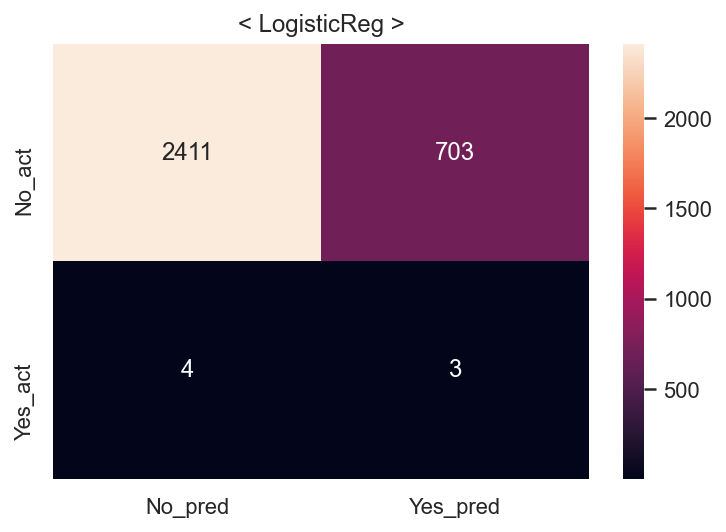

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


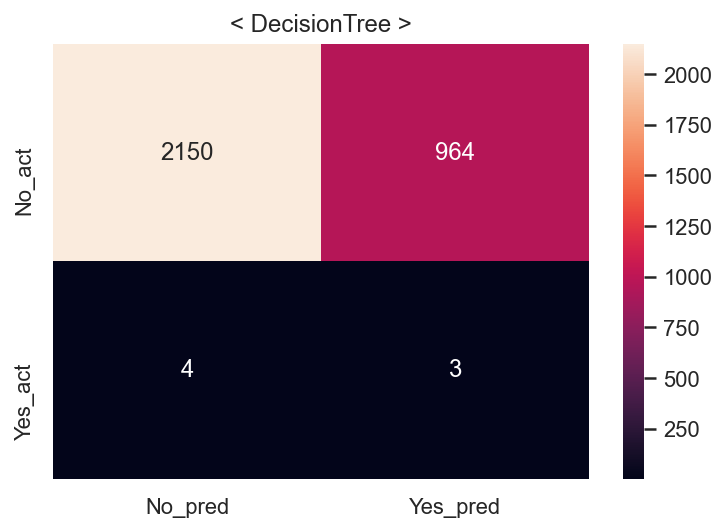

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


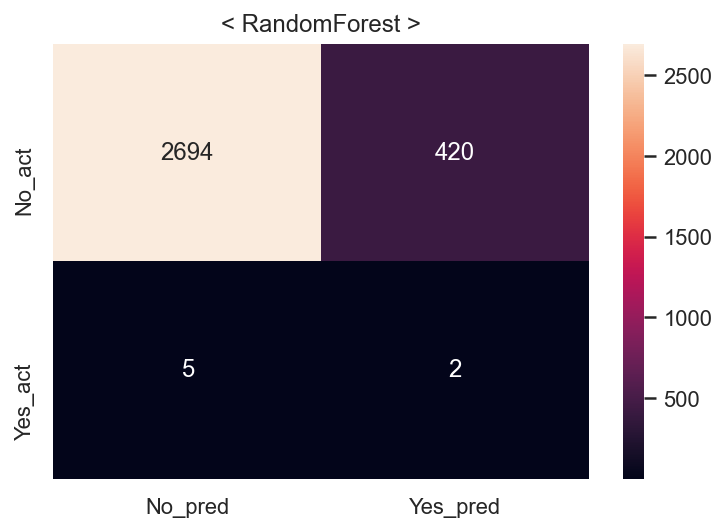

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


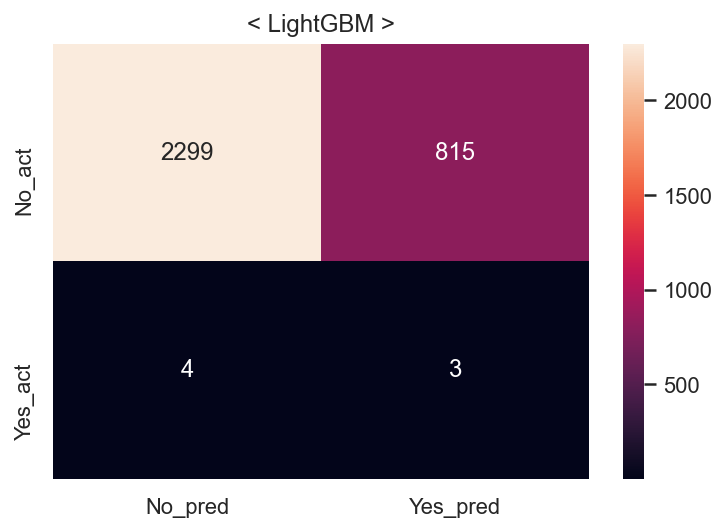

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.8s
====Done Evaluation====
====Done Evaluation====


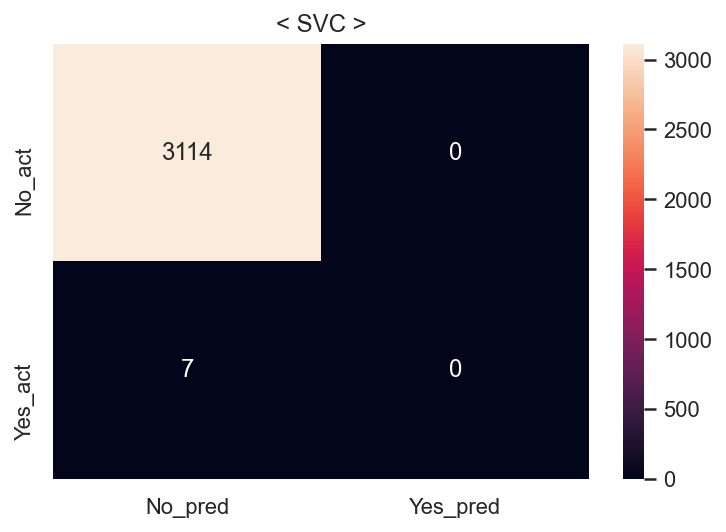

Fit time : 3.01 min


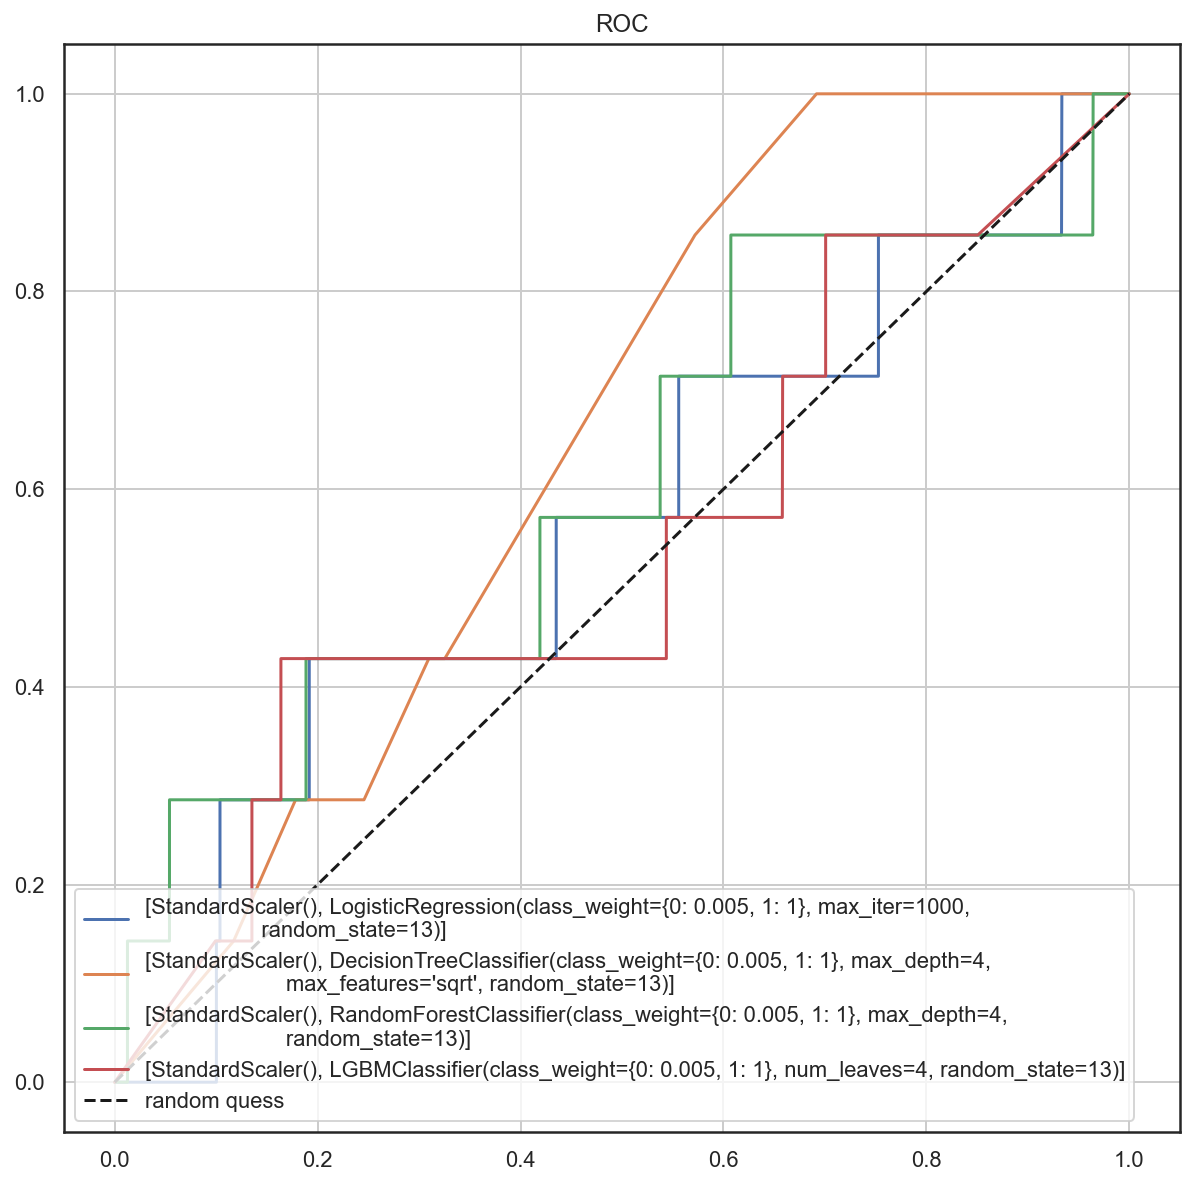

In [29]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df11 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [30]:
result_df11["null_del"] = [0] * len(result_df11)
result_df11["encoded"] = [1]  * len(result_df11)
result_df11["scaler"] = ["SD"]  * len(result_df11)
result_df11["sampler"] = ["BdlSMOTE"]  * len(result_df11)
result_df11 = result_df11[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df11

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1     SD  BdlSMOTE   LogisticReg        0.929866   
1         0        1     SD  BdlSMOTE  DecisionTree        0.899563   
2         0        1     SD  BdlSMOTE  RandomForest        0.965167   
3         0        1     SD  BdlSMOTE      LightGBM        0.904053   
4         0        1     SD  BdlSMOTE           SVC        0.998672   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.877348      0.999453  0.934429   0.929866       0.773470   
1         0.833203      0.999141  0.908658   0.899563       0.689843   
2         0.936018      0.998594  0.966294   0.965167       0.863826   
3         0.839357      0.999375  0.912403   0.904053       0.737584   
4         1.000000      0.997345  0.998671   0.998672       0.997757   

   test precision  test recall   test f1  test auc  
0        0.004249     0.428571  0.008415  0.601408  
1        0.003102     0.428571  0.006160  0.559501  
2        0.004739     0.285714  0.009324  0.575420  
3        0.003667     0.428571  0.007273  0.583425  
4        0.000000     0.000000  0.000000  0.500000

### (12) null_del = N , encoded = Y , scaler = RB

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.4s
====Done Evaluation====
====Done Evaluation====


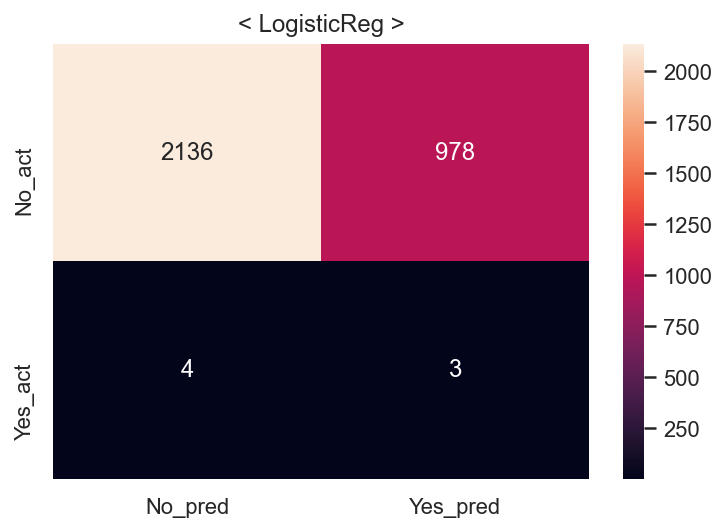

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


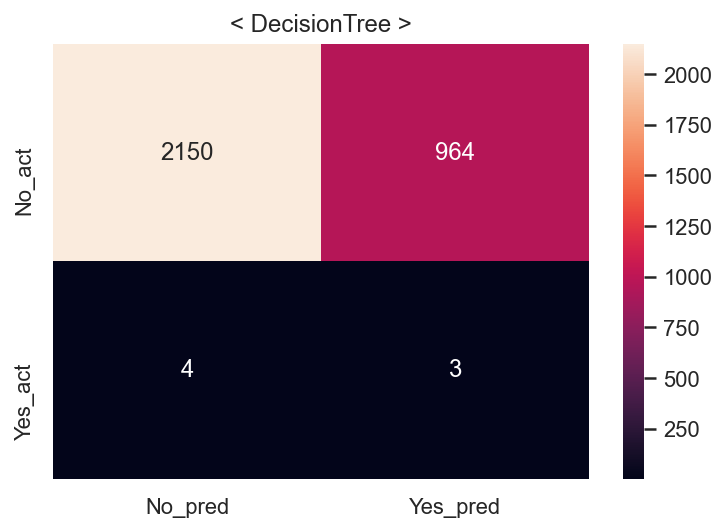

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.7s
====Done Evaluation====
====Done Evaluation====


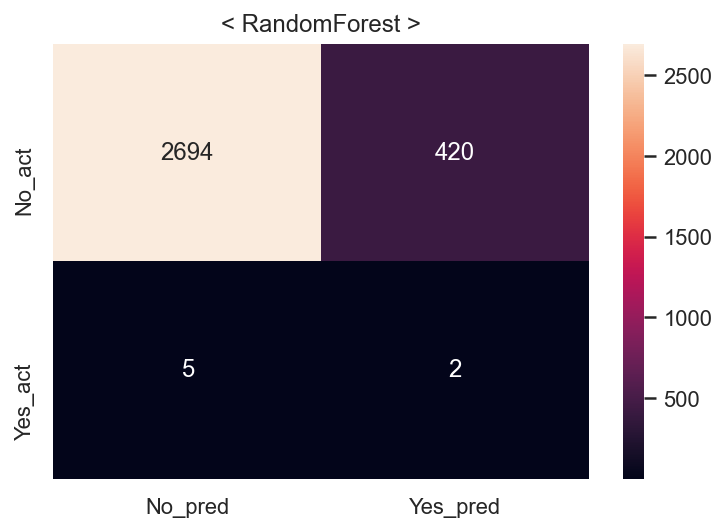

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


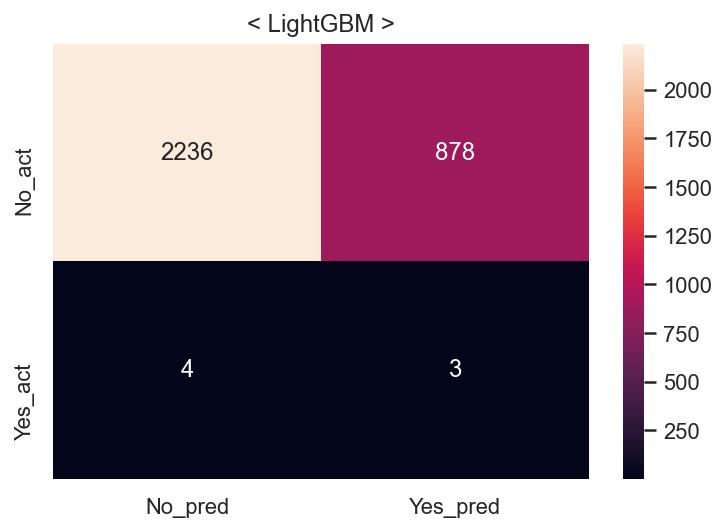

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  30.8s
====Done Evaluation====
====Done Evaluation====


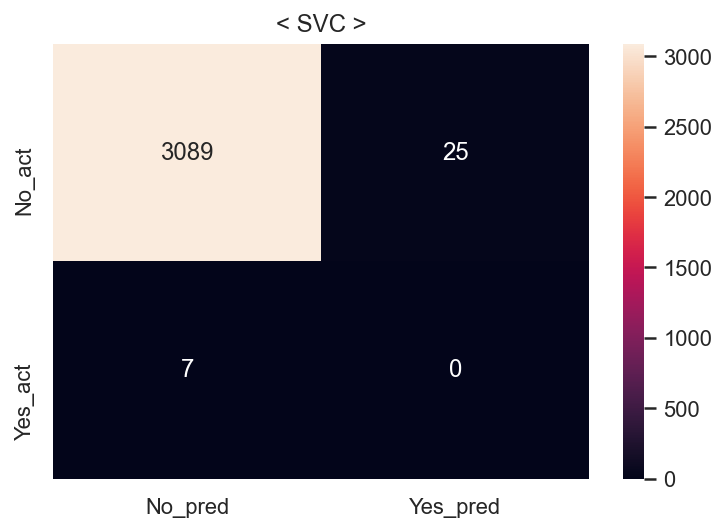

Fit time : 5.33 min


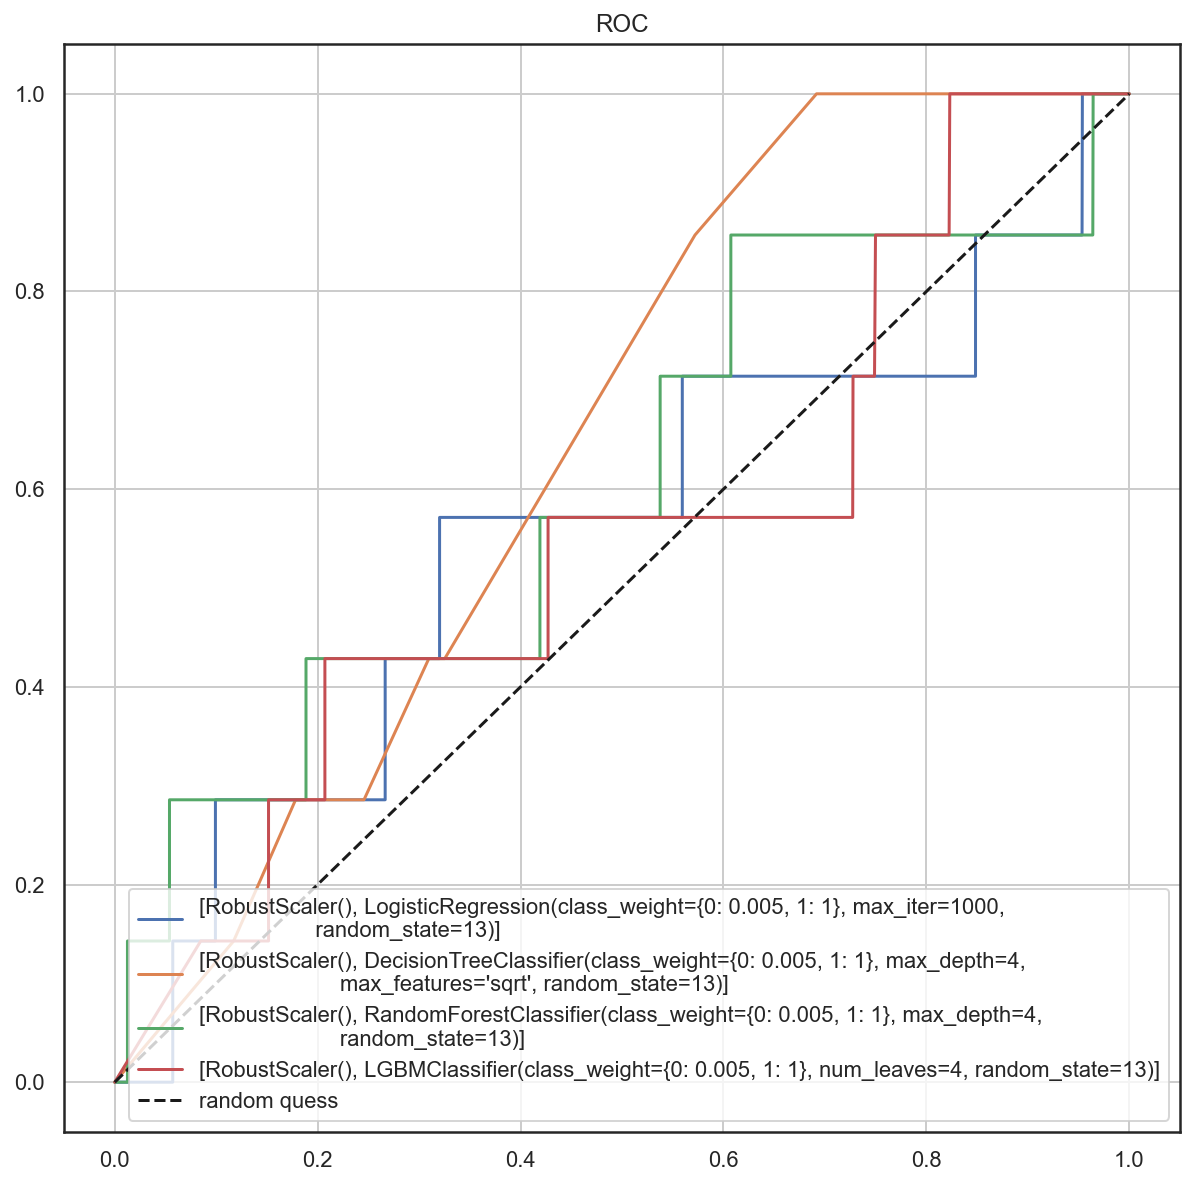

In [31]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list12, result_df12 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [32]:
result_df12["null_del"] = [0] * len(result_df12)
result_df12["encoded"] = [1]  * len(result_df12)
result_df12["scaler"] = ["RB"]  * len(result_df12)
result_df12["sampler"] = ["BdlSMOTE"]  * len(result_df12)
result_df12 = result_df12[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df12

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1     RB  BdlSMOTE   LogisticReg        0.900305   
1         0        1     RB  BdlSMOTE  DecisionTree        0.899563   
2         0        1     RB  BdlSMOTE  RandomForest        0.965167   
3         0        1     RB  BdlSMOTE      LightGBM        0.899328   
4         0        1     RB  BdlSMOTE           SVC        0.995665   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.834279      0.999063  0.909265   0.900305       0.685357   
1         0.833203      0.999141  0.908658   0.899563       0.689843   
2         0.936018      0.998594  0.966294   0.965167       0.863826   
3         0.832878      0.999141  0.908465   0.899328       0.717398   
4         0.993929      0.997423  0.995673   0.995665       0.989747   

   test precision  test recall   test f1  test auc  
0        0.003058     0.428571  0.006073  0.557253  
1        0.003102     0.428571  0.006160  0.559501  
2        0.004739     0.285714  0.009324  0.575420  
3        0.003405     0.428571  0.006757  0.573309  
4        0.000000     0.000000  0.000000  0.495986

### (13) null_del = N , encoded = N , scaler = No

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


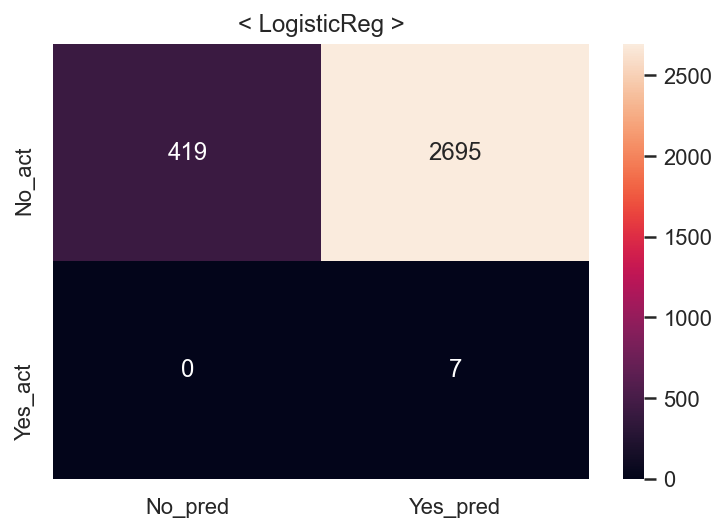

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


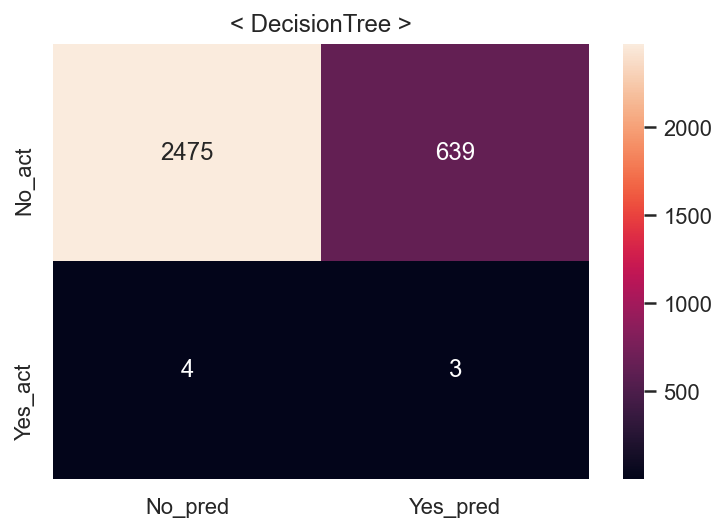

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.7s
====Done Evaluation====
====Done Evaluation====


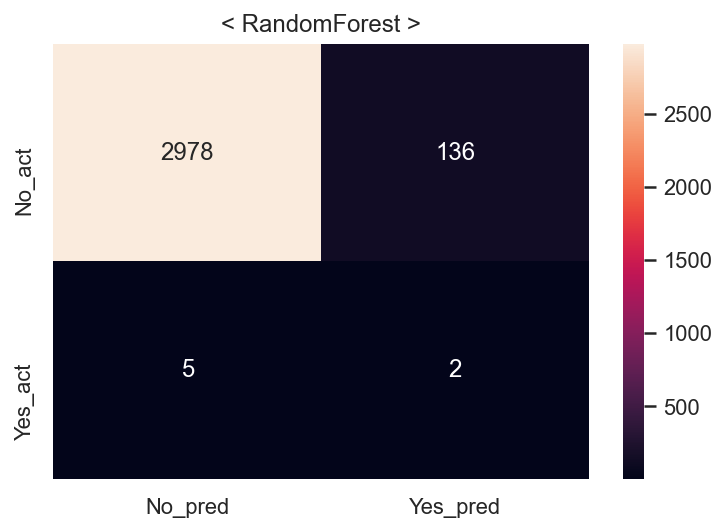

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


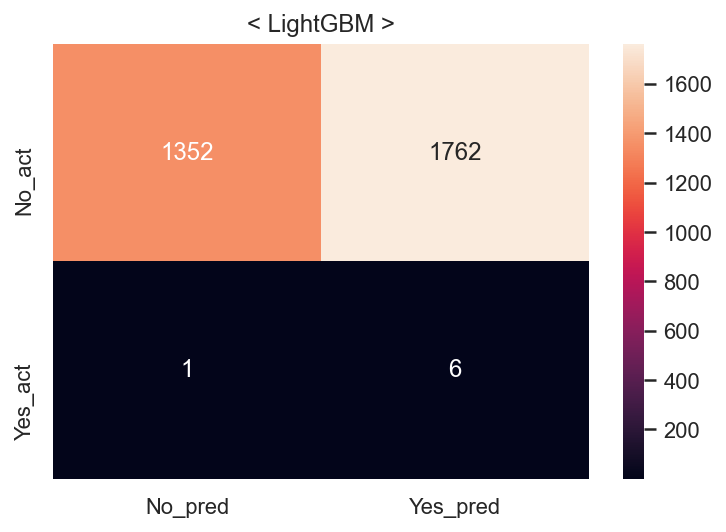

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  28.5s
====Done Evaluation====
====Done Evaluation====


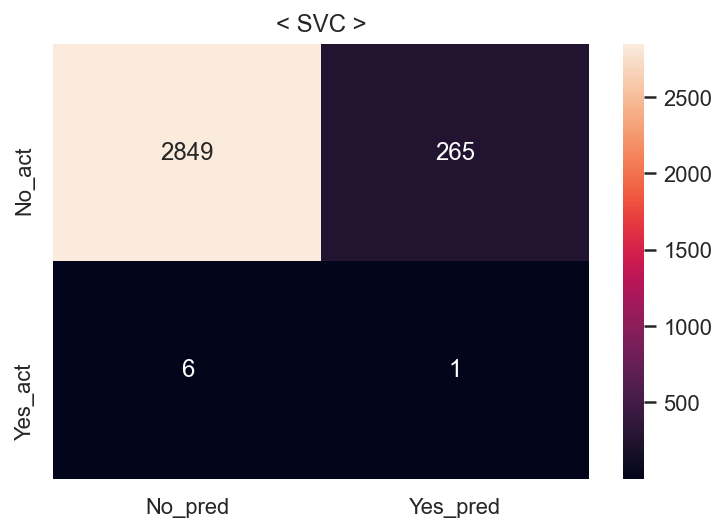

Fit time : 6.71 min


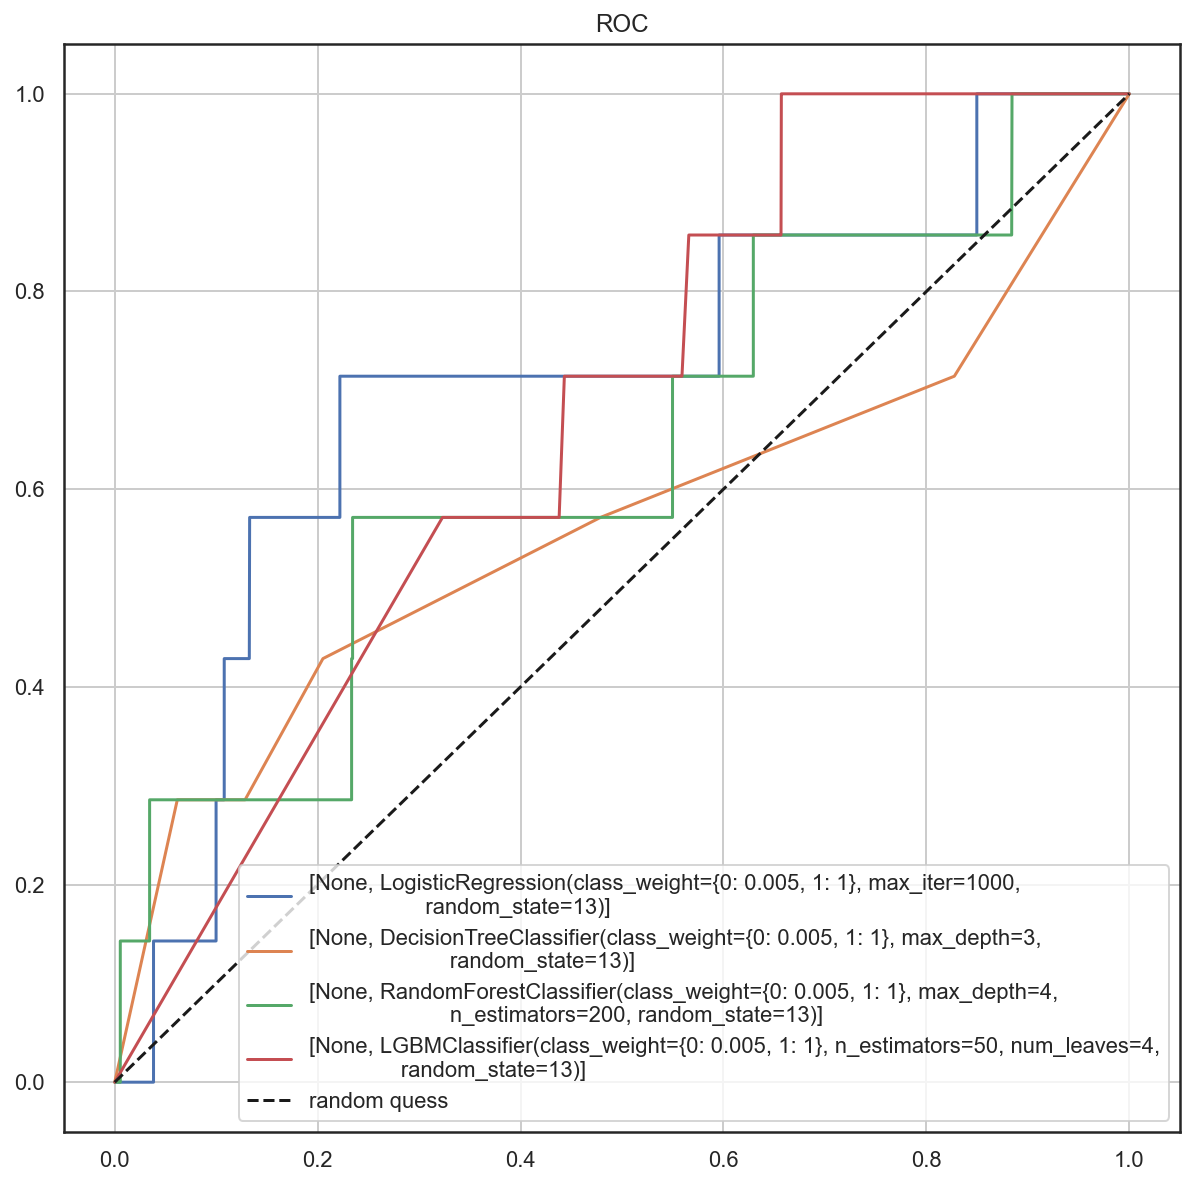

In [33]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list13, result_df13 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [34]:
result_df13["null_del"] = [0] * len(result_df13)
result_df13["encoded"] = [0]  * len(result_df13)
result_df13["scaler"] = ["None"]  * len(result_df13)
result_df13["sampler"] = ["BdlSMOTE"]  * len(result_df13)
result_df13 = result_df13[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df13

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0   None  BdlSMOTE   LogisticReg        0.562090   
1         0        0   None  BdlSMOTE  DecisionTree        0.922563   
2         0        0   None  BdlSMOTE  RandomForest        0.984770   
3         0        0   None  BdlSMOTE      LightGBM        0.779249   
4         0        0   None  BdlSMOTE           SVC        0.934864   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.533114      0.999609  0.695371   0.562090       0.136495   
1         0.866640      0.998828  0.928051   0.922563       0.793976   
2         0.972015      0.998282  0.984973   0.984770       0.954822   
3         0.693952      0.999141  0.819040   0.779249       0.435117   
4         0.918458      0.954467  0.936116   0.934864       0.913169   

   test precision  test recall   test f1  test auc  
0        0.002591     1.000000  0.005168  0.567277  
1        0.004673     0.428571  0.009245  0.611685  
2        0.014493     0.285714  0.027586  0.621020  
3        0.003394     0.857143  0.006761  0.645656  
4        0.003759     0.142857  0.007326  0.528879

### (14) null_del = N , encoded = N , scaler = MM

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


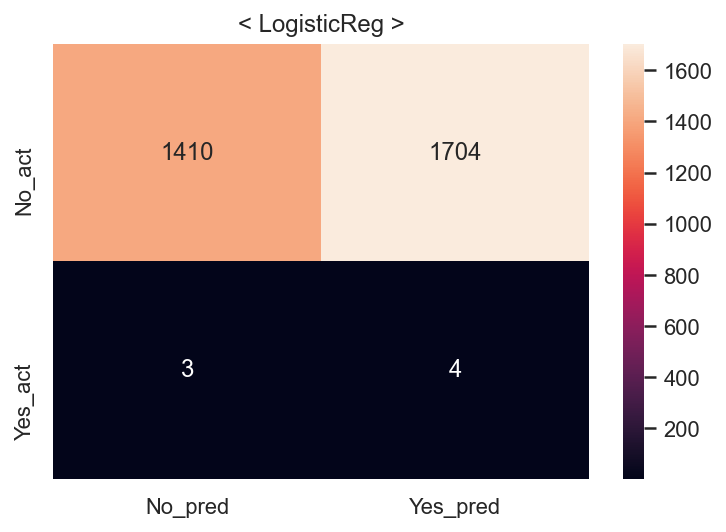

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


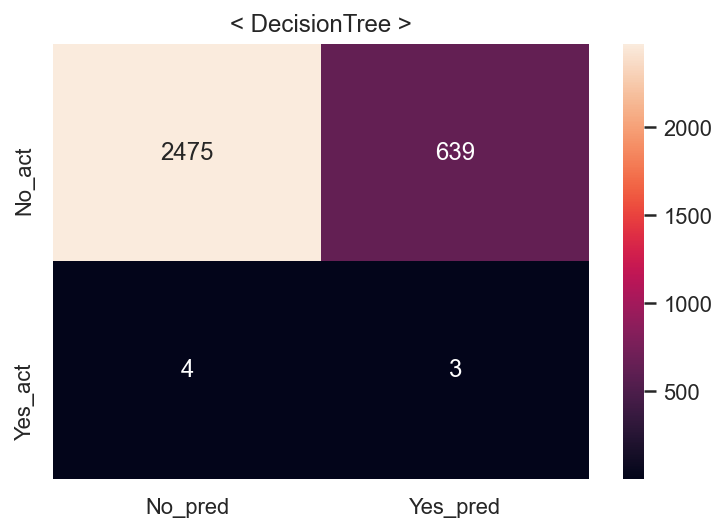

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.8s
====Done Evaluation====
====Done Evaluation====


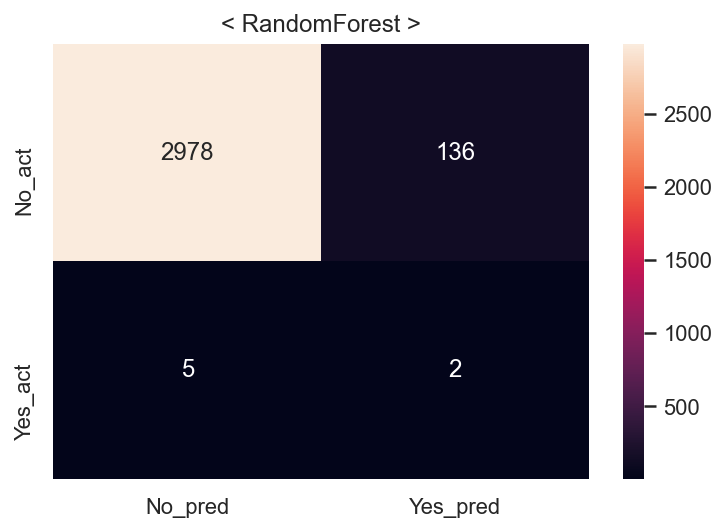

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


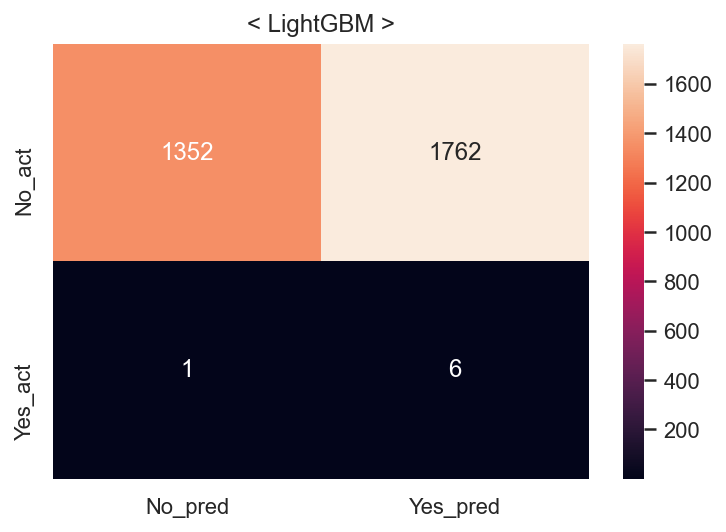

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   2.9s
====Done Evaluation====
====Done Evaluation====


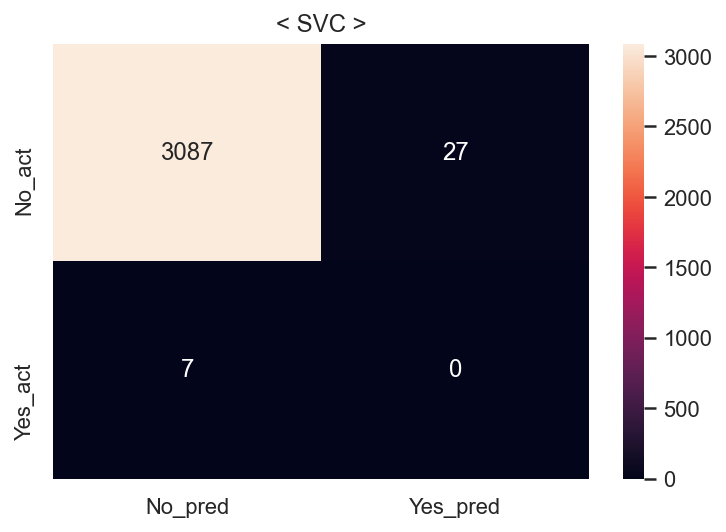

Fit time : 4.34 min


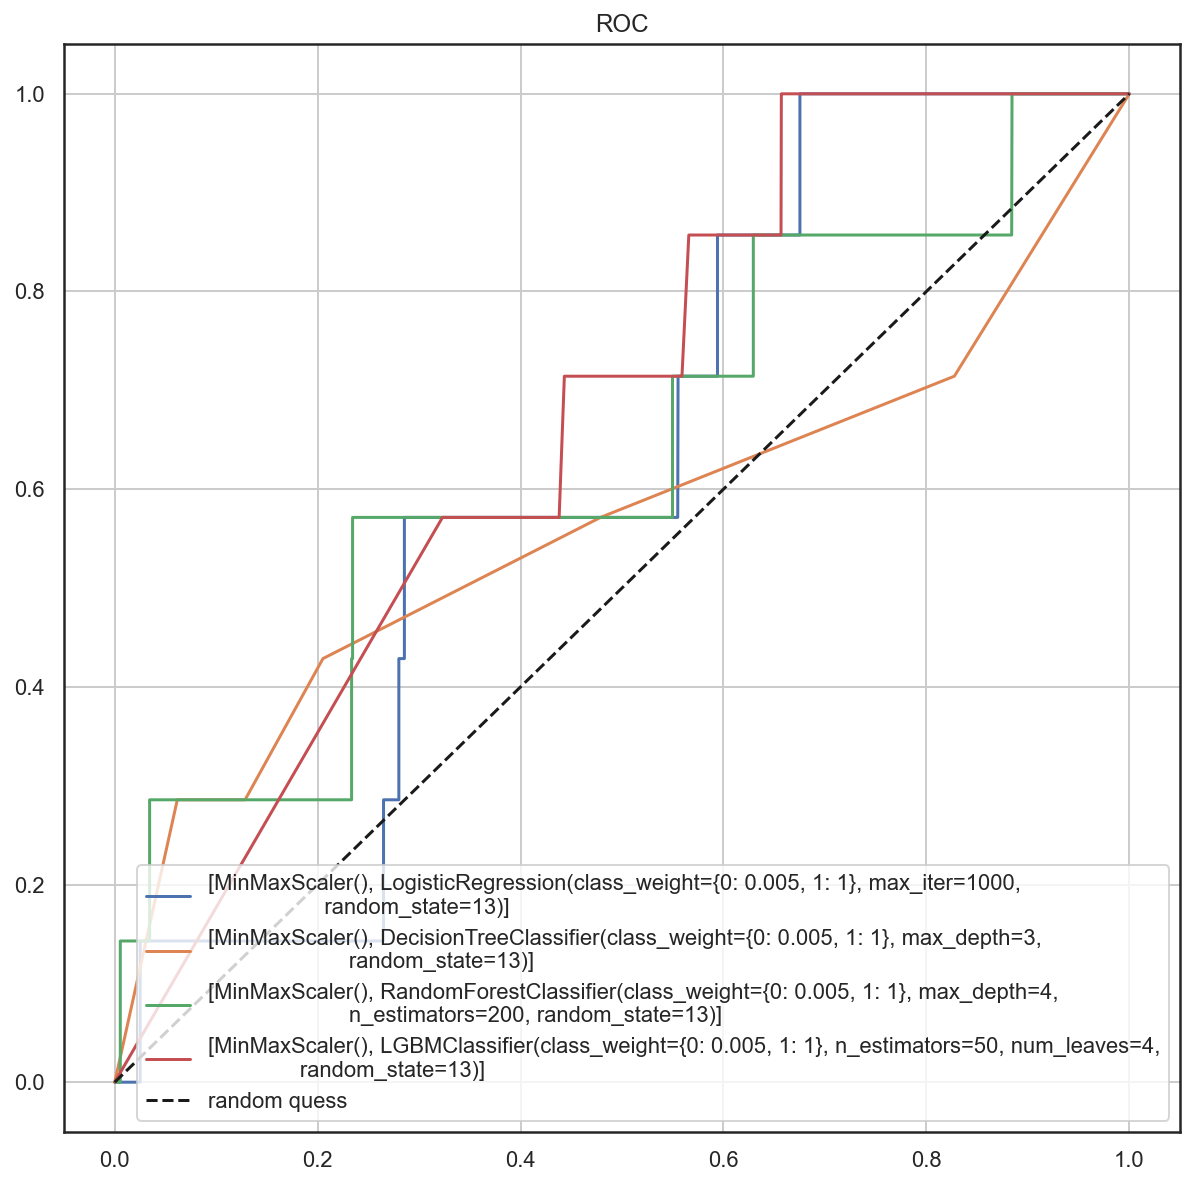

In [35]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list14, result_df14 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [36]:
result_df14["null_del"] = [0] * len(result_df14)
result_df14["encoded"] = [0]  * len(result_df14)
result_df14["scaler"] = ["MM"]  * len(result_df14)
result_df14["sampler"] = ["BdlSMOTE"]  * len(result_df14)
result_df14 = result_df14[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df14

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0     MM  BdlSMOTE   LogisticReg        0.748087   
1         0        0     MM  BdlSMOTE  DecisionTree        0.922563   
2         0        0     MM  BdlSMOTE  RandomForest        0.984770   
3         0        0     MM  BdlSMOTE      LightGBM        0.779249   
4         0        0     MM  BdlSMOTE           SVC        0.995041   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.665193      0.998985  0.798614   0.748087       0.453060   
1         0.866640      0.998828  0.928051   0.922563       0.793976   
2         0.972015      0.998282  0.984973   0.984770       0.954822   
3         0.693952      0.999141  0.819040   0.779249       0.435117   
4         0.992770      0.997345  0.995052   0.995041       0.989106   

   test precision  test recall   test f1  test auc  
0        0.002342     0.571429  0.004665  0.512111  
1        0.004673     0.428571  0.009245  0.611685  
2        0.014493     0.285714  0.027586  0.621020  
3        0.003394     0.857143  0.006761  0.645656  
4        0.000000     0.000000  0.000000  0.495665

### (15) null_del = N , encoded = N , scaler = SD

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


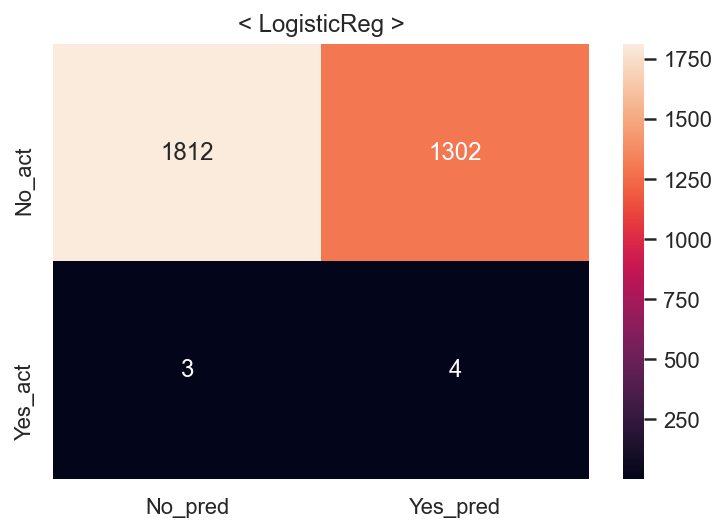

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


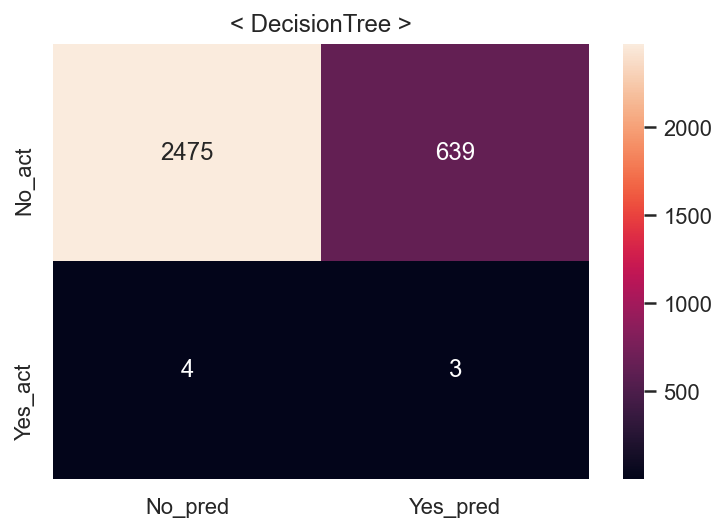

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.7s
====Done Evaluation====
====Done Evaluation====


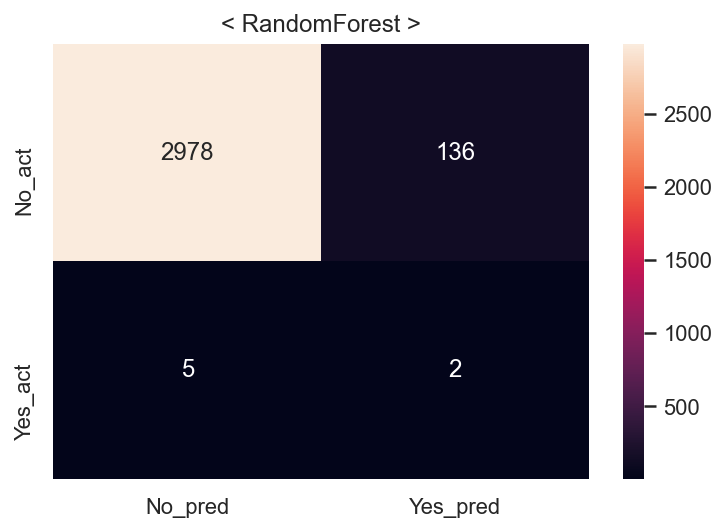

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


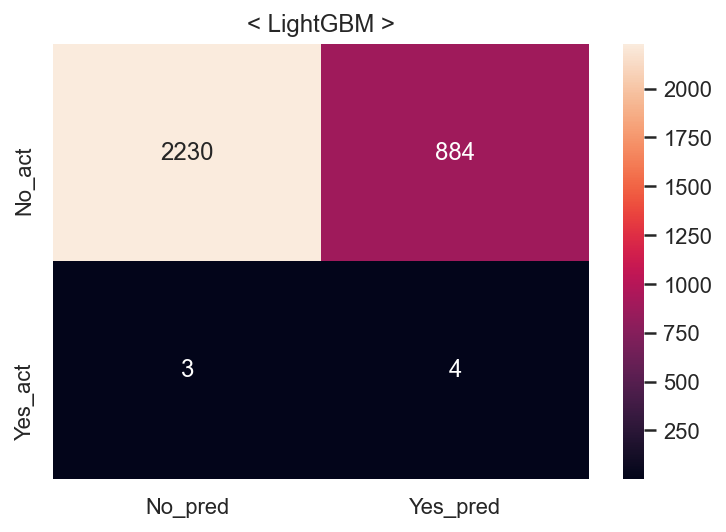

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   5.5s
====Done Evaluation====
====Done Evaluation====


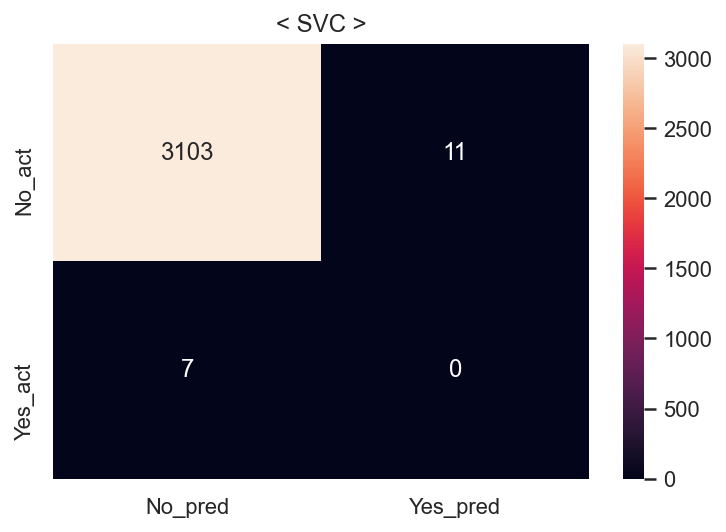

Fit time : 4.41 min


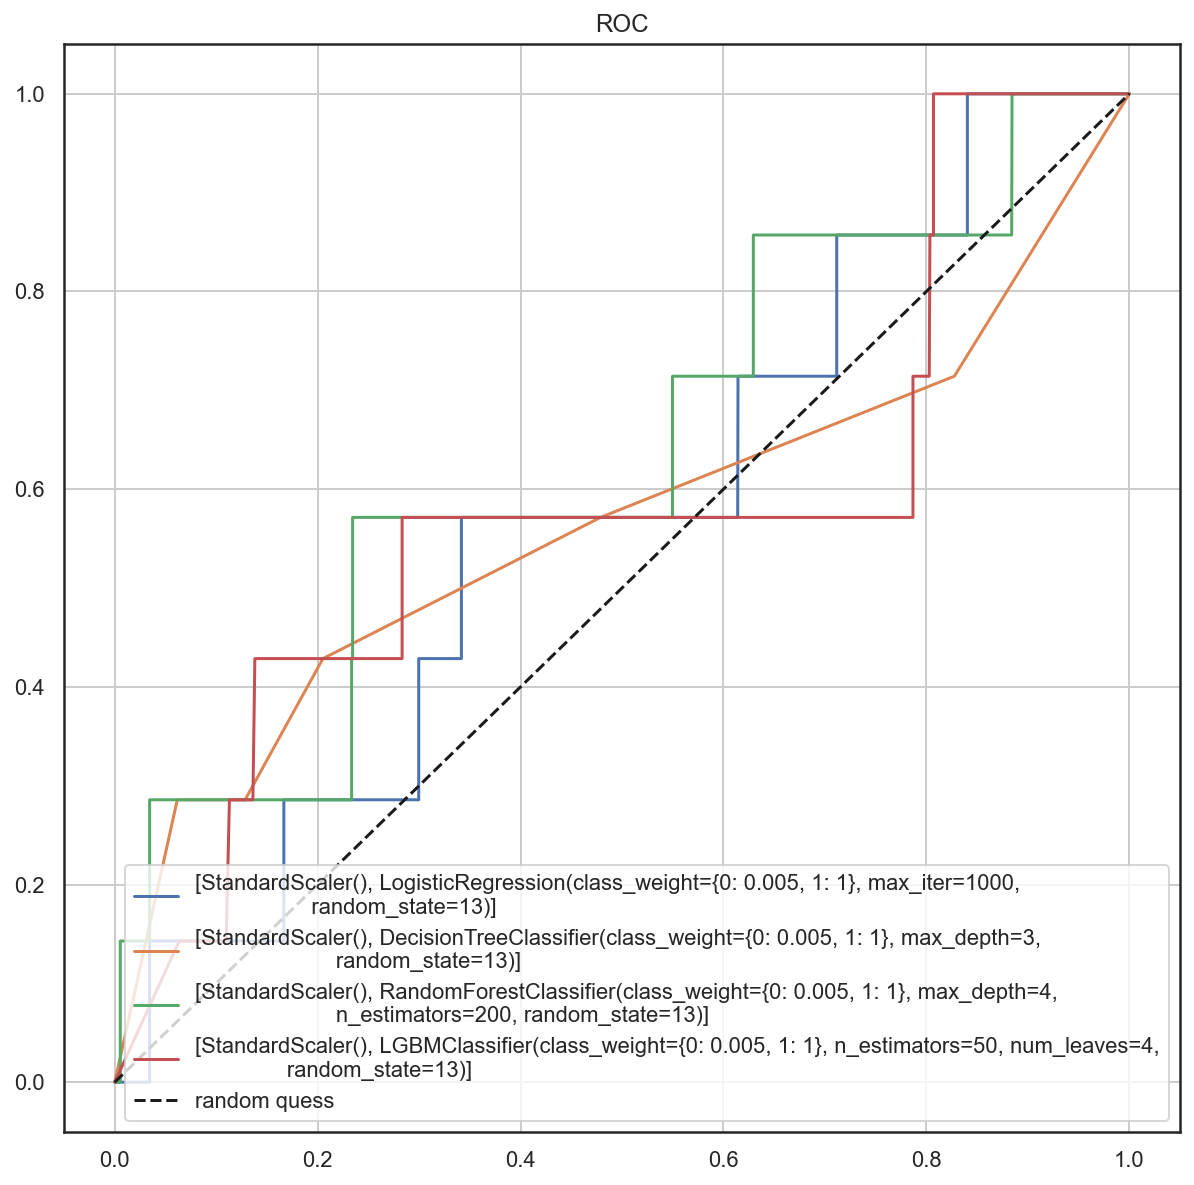

In [37]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list15, result_df15 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [38]:
result_df15["null_del"] = [0] * len(result_df15)
result_df15["encoded"] = [0]  * len(result_df15)
result_df15["scaler"] = ["SD"]  * len(result_df15)
result_df15["sampler"] = ["BdlSMOTE"]  * len(result_df15)
result_df15 = result_df15[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df15

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0     SD  BdlSMOTE   LogisticReg        0.816698   
1         0        0     SD  BdlSMOTE  DecisionTree        0.922563   
2         0        0     SD  BdlSMOTE  RandomForest        0.984770   
3         0        0     SD  BdlSMOTE      LightGBM        0.891011   
4         0        0     SD  BdlSMOTE           SVC        0.997462   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.732086      0.998985  0.844960   0.816698       0.581865   
1         0.866640      0.998828  0.928051   0.922563       0.793976   
2         0.972015      0.998282  0.984973   0.984770       0.954822   
3         0.821734      0.998672  0.901604   0.891011       0.715796   
4         0.997578      0.997345  0.997461   0.997462       0.994233   

   test precision  test recall   test f1  test auc  
0        0.003063     0.571429  0.006093  0.576658  
1        0.004673     0.428571  0.009245  0.611685  
2        0.014493     0.285714  0.027586  0.621020  
3        0.004505     0.571429  0.008939  0.643775  
4        0.000000     0.000000  0.000000  0.498234

### (16) null_del = N , encoded = N , scaler = RB

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


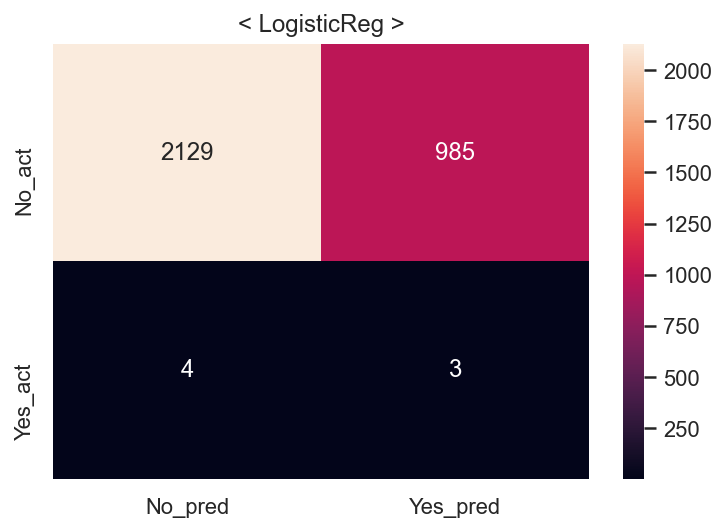

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
====Done Evaluation====
====Done Evaluation====


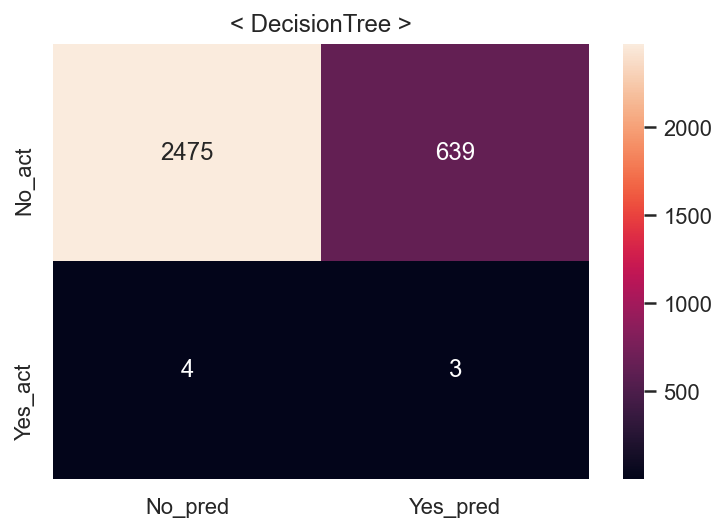

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.9s
====Done Evaluation====
====Done Evaluation====


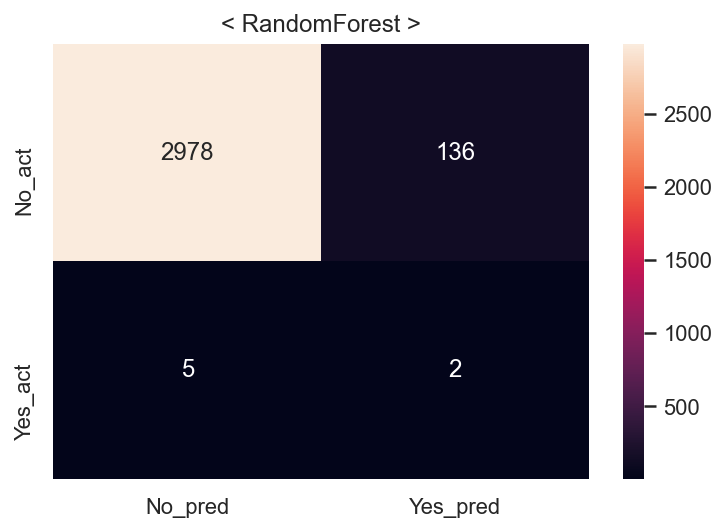

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


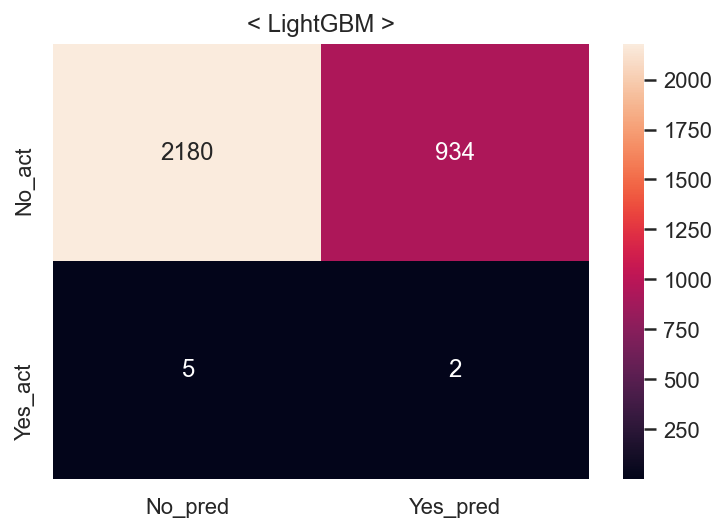

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  19.1s
====Done Evaluation====
====Done Evaluation====


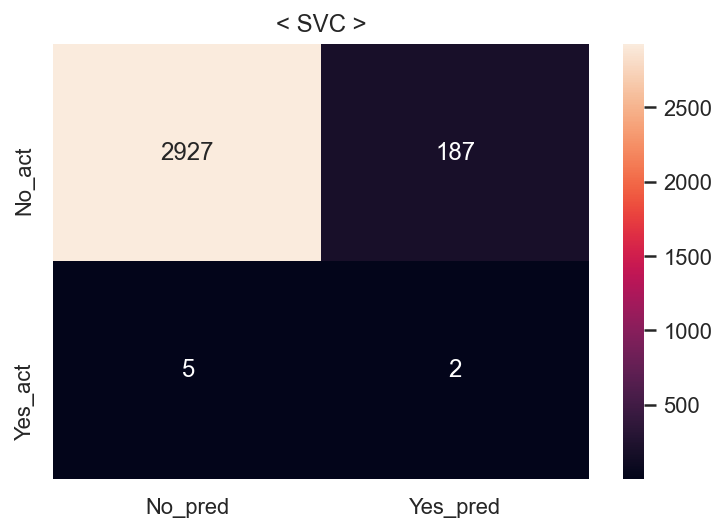

Fit time : 5.98 min


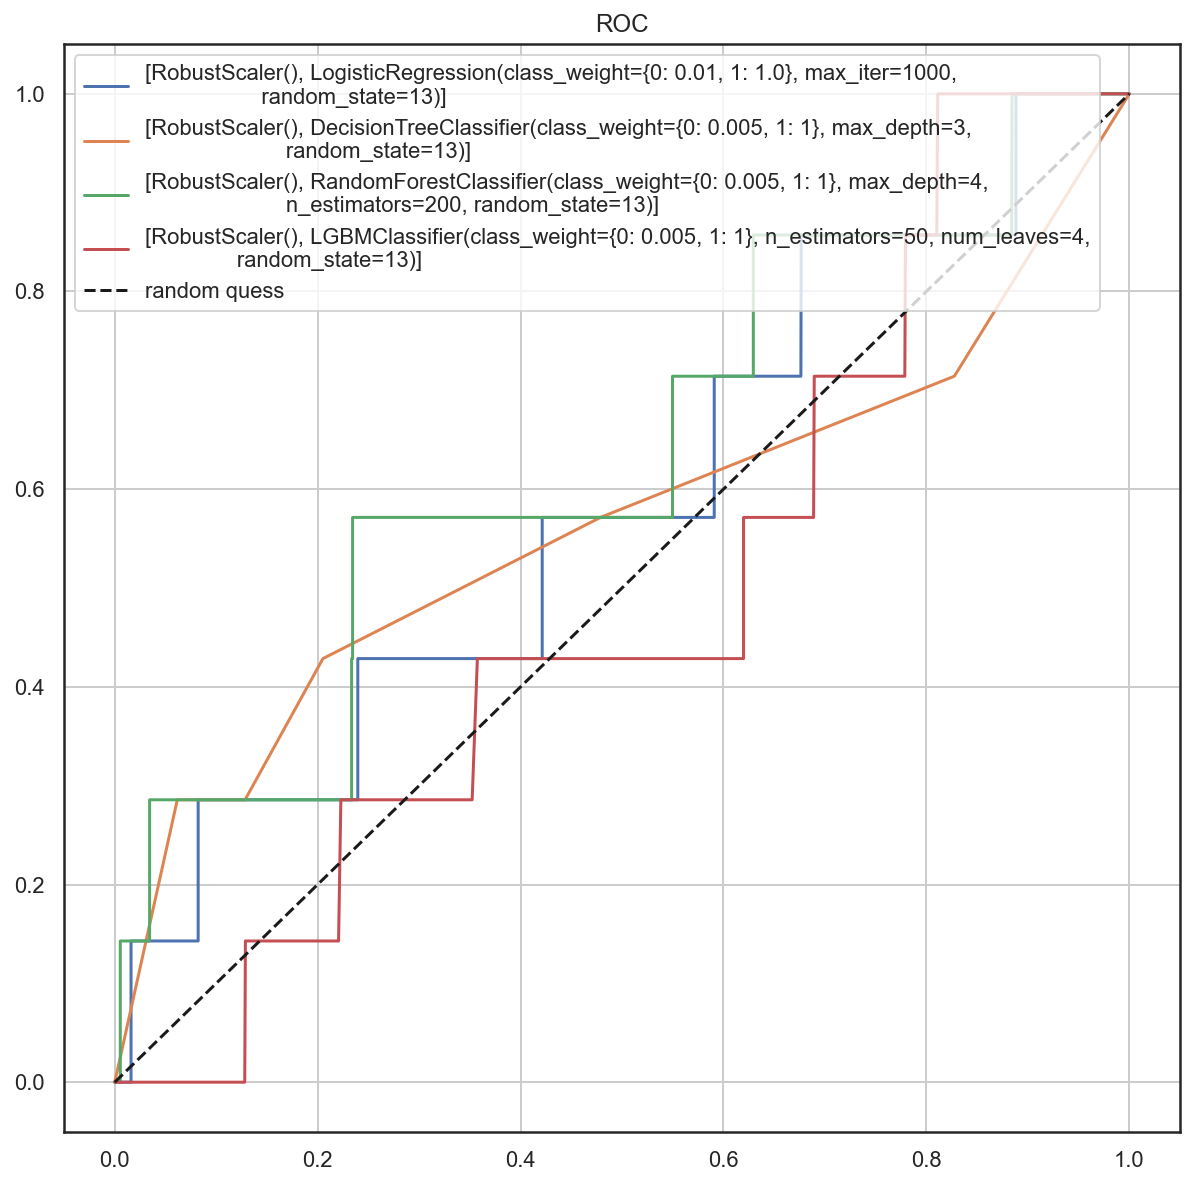

In [39]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


cv_list16, result_df16 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [40]:
result_df16["null_del"] = [0] * len(result_df16)
result_df16["encoded"] = [0]  * len(result_df16)
result_df16["scaler"] = ["RB"]  * len(result_df16)
result_df16["sampler"] = ["BdlSMOTE"]  * len(result_df16)
result_df16 = result_df16[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df16

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0     RB  BdlSMOTE   LogisticReg        0.866643   
1         0        0     RB  BdlSMOTE  DecisionTree        0.922563   
2         0        0     RB  BdlSMOTE  RandomForest        0.984770   
3         0        0     RB  BdlSMOTE      LightGBM        0.874570   
4         0        0     RB  BdlSMOTE           SVC        0.974032   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.790017      0.998750  0.882205   0.866643       0.683114   
1         0.866640      0.998828  0.928051   0.922563       0.793976   
2         0.972015      0.998282  0.984973   0.984770       0.954822   
3         0.799862      0.999141  0.888464   0.874570       0.699135   
4         0.952441      0.997891  0.974637   0.974032       0.938481   

   test precision  test recall   test f1  test auc  
0        0.003036     0.428571  0.006030  0.556129  
1        0.004673     0.428571  0.009245  0.611685  
2        0.014493     0.285714  0.027586  0.621020  
3        0.002137     0.285714  0.004242  0.492889  
4        0.010582     0.285714  0.020408  0.612831

In [41]:
# 중간 결산
df_subtotal_classweight = pd.concat([result_df1, result_df2, result_df3, result_df4, 
                        result_df5, result_df6, result_df7, result_df8,
                        result_df9, result_df10, result_df11, result_df12,
                        result_df13, result_df14, result_df15, result_df16], axis=0).reset_index(drop=True)
print(df_subtotal_classweight.shape)
df_subtotal_classweight.tail(3)

(80, 15)


null_del  encoded scaler   sampler    classifier  train accuracy  \
77         0        0     RB  BdlSMOTE  RandomForest        0.984770   
78         0        0     RB  BdlSMOTE      LightGBM        0.874570   
79         0        0     RB  BdlSMOTE           SVC        0.974032   

    train precision  train recall  train f1  train auc  test accuracy  \
77         0.972015      0.998282  0.984973   0.984770       0.954822   
78         0.799862      0.999141  0.888464   0.874570       0.699135   
79         0.952441      0.997891  0.974637   0.974032       0.938481   

    test precision  test recall   test f1  test auc  
77        0.014493     0.285714  0.027586  0.621020  
78        0.002137     0.285714  0.004242  0.492889  
79        0.010582     0.285714  0.020408  0.612831

In [42]:
df_subtotal_classweight.columns

Index(['null_del', 'encoded', 'scaler', 'sampler', 'classifier',
       'train accuracy', 'train precision', 'train recall', 'train f1',
       'train auc', 'test accuracy', 'test precision', 'test recall',
       'test f1', 'test auc'],
      dtype='object')

In [44]:
df_subtotal_classweight["class_weight"] = 1
df_subtotal_classweight = df_subtotal_classweight[['class_weight', 'null_del', 'encoded', 'scaler', 'sampler', 'classifier',
       'train accuracy', 'train precision', 'train recall', 'train f1',
       'train auc', 'test accuracy', 'test precision', 'test recall',
       'test f1', 'test auc']]
df_subtotal_classweight.tail(3)

class_weight  null_del  encoded scaler   sampler    classifier  \
77             1         0        0     RB  BdlSMOTE  RandomForest   
78             1         0        0     RB  BdlSMOTE      LightGBM   
79             1         0        0     RB  BdlSMOTE           SVC   

    train accuracy  train precision  train recall  train f1  train auc  \
77        0.984770         0.972015      0.998282  0.984973   0.984770   
78        0.874570         0.799862      0.999141  0.888464   0.874570   
79        0.974032         0.952441      0.997891  0.974637   0.974032   

    test accuracy  test precision  test recall   test f1  test auc  
77       0.954822        0.014493     0.285714  0.027586  0.621020  
78       0.699135        0.002137     0.285714  0.004242  0.492889  
79       0.938481        0.010582     0.285714  0.020408  0.612831

In [45]:
df_subtotal_classweight.to_csv('borderlineSMOTE_classweight_result.csv', encoding='utf-8-sig')